In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install folium


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install irl-maxent


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install geopy


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install networkx


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import BeautifyIcon

from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
import calendar
from geopy.distance import geodesic
import networkx as nx
from irl_maxent import maxent, trajectory, optimizer
import logging
from sklearn.impute import SimpleImputer

from pandas.plotting import parallel_coordinates


# Set up logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


In [ ]:
df_1 = pd.read_csv("/teamspace/studios/this_studio/data_POI_2014_to_2022.csv",low_memory=False)
df_2 = pd.read_csv("/teamspace/studios/this_studio/poi_info.csv")

In [ ]:
df_1.head(10)

,activation_date,id_vc,visit_timestamp,profile_vc,poi
0,2014-01-01,0415C18ABF3181,2014-01-01 13:59:00,24 Ore,61
1,2014-01-01,0433E08ABF3180,2014-01-01 15:48:00,24 Ore,61
2,2014-01-01,04D7658ABF3180,2014-01-01 15:31:00,72 Ore,61
3,2014-01-01,04A1F18ABF3180,2014-01-01 16:34:00,72 Ore,61
4,2014-01-01,048B148ABF3184,2014-01-01 16:34:00,72 Ore,61
5,2014-01-01,0416A48ABF3181,2014-01-01 16:38:00,24 Ore,61
6,2014-01-01,0421A48ABF3181,2014-01-01 16:38:00,24 Ore,61
7,2014-01-01,04B1AD8ABF3180,2014-01-01 13:56:00,24 Ore,61
8,2014-01-01,0492138ABF3184,2014-01-01 16:40:00,72 Ore,61
9,2014-01-01,04AB138ABF3184,2014-01-01 16:40:00,72 Ore,61


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770399 entries, 0 to 2770398
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   activation_date  object
 1   id_vc            object
 2   visit_timestamp  object
 3   profile_vc       object
 4   poi              int64 
dtypes: int64(1), object(4)
memory usage: 105.7+ MB


In [ ]:
df_2.tail()

,poi_id,poi_name,category_id,category_name,longitude,latitude
37,61,Casa di Giulietta,4,Musei e Centri Espositivi,10.998430,45.441851
38,76,Museo Lapidario Maffeiano,4,Musei e Centri Espositivi,10.991092,45.438267
39,203,"Galleria d'Arte Moderna ""Achille Forti""",4,Musei e Centri Espositivi,10.998025,45.443123
40,61,Casa di Giulietta,5,"Palazzi, torri e castelli",10.998430,45.441851
41,45,Sito archeologico degli scavi Scaligeri,6,Siti archeologici,10.999845,45.443061


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poi_id         42 non-null     int64  
 1   poi_name       42 non-null     object 
 2   category_id    42 non-null     int64  
 3   category_name  42 non-null     object 
 4   longitude      42 non-null     float64
 5   latitude       42 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.1+ KB


In [ ]:
df_2["category_id"].unique()

array([1, 2, 4, 5, 6])

In [ ]:
duplicate_pois = df_2.groupby('poi_id').filter(lambda x: x['category_id'].nunique() > 1)

In [ ]:
duplicate_pois.head(40)

,poi_id,poi_name,category_id,category_name,longitude,latitude
34,45,Sito archeologico degli scavi Scaligeri,4,Musei e Centri Espositivi,10.999845,45.443061
37,61,Casa di Giulietta,4,Musei e Centri Espositivi,10.998430,45.441851
40,61,Casa di Giulietta,5,"Palazzi, torri e castelli",10.998430,45.441851
41,45,Sito archeologico degli scavi Scaligeri,6,Siti archeologici,10.999845,45.443061


In [ ]:
# Count of places with category_id 5 and 6
count_category_5 = df_2[df_2['category_id'] == 5].shape[0]
count_category_6 = df_2[df_2['category_id'] == 6].shape[0]

print(f"Number of places with category_id 5: {count_category_5}")
print(f"Number of places with category_id 6: {count_category_6}")

# Display the unique category IDs in the original dataframe
print("\nUnique category IDs in the original dataframe:")
print(df_2['category_id'].unique())

# Show the duplicate POIs
duplicate_pois = df_2.groupby('poi_id').filter(lambda x: x['category_id'].nunique() > 1)
print("\nDuplicate POIs:")
print(duplicate_pois)

Number of places with category_id 5: 1
Number of places with category_id 6: 1

Unique category IDs in the original dataframe:
[1 2 4 5 6]

Duplicate POIs:
    poi_id                                 poi_name  category_id  \
34      45  Sito archeologico degli scavi Scaligeri            4   
37      61                        Casa di Giulietta            4   
40      61                        Casa di Giulietta            5   
41      45  Sito archeologico degli scavi Scaligeri            6   

                category_name  longitude   latitude  
34  Musei e Centri Espositivi  10.999845  45.443061  
37  Musei e Centri Espositivi  10.998430  45.441851  
40  Palazzi, torri e castelli  10.998430  45.441851  
41          Siti archeologici  10.999845  45.443061  


In [ ]:
def combine_categories(group):
    combined_category = ' e '.join(sorted(group['category_name'].unique()))
    new_row = group.iloc[0].copy()

    if combined_category == "Musei e Centri Espositivi e Siti archeologici":
        new_row['category_id'] = 7
    elif combined_category == "Musei e Centri Espositivi e Palazzi, torri e castelli":
        new_row['category_id'] = 8
    else:
        new_row['category_id'] = 9  # Fallback for any unexpected combinations

    new_row['category_name'] = combined_category
    return new_row

# Identify duplicate POIs
duplicate_pois = df_2.groupby('poi_id').filter(lambda x: x['category_id'].nunique() > 1)

# Process only the duplicate POIs
combined_pois = duplicate_pois.groupby('poi_id').apply(combine_categories).reset_index(drop=True)

# Update df_2: remove the old duplicate entries and add the new combined ones
df_2 = df_2[~df_2['poi_id'].isin(duplicate_pois['poi_id'])]
df_2 = pd.concat([df_2, combined_pois]).reset_index(drop=True)

# Sort the dataframe by poi_id for better readability
df_2 = df_2.sort_values('poi_id').reset_index(drop=True)

# Verify the changes
print("Unique category IDs in updated df_2:")
print(df_2['category_id'].unique())

print("\nUpdated entries for previously duplicate POIs:")
print(df_2[df_2['poi_id'].isin([45, 61])])

print("\nCount of each category ID in updated df_2:")
print(df_2['category_id'].value_counts().sort_index())

Unique category IDs in updated df_2:
[4 2 7 1 8]

Updated entries for previously duplicate POIs:
    poi_id                                 poi_name  category_id  \
3       45  Sito archeologico degli scavi Scaligeri            7   
19      61                        Casa di Giulietta            8   

                                        category_name  longitude   latitude  
3       Musei e Centri Espositivi e Siti archeologici  10.999845  45.443061  
19  Musei e Centri Espositivi e Palazzi, torri e c...  10.998430  45.441851  

Count of each category ID in updated df_2:
category_id
1     9
2    22
4     7
7     1
8     1
Name: count, dtype: int64


In [ ]:
df_2[df_2['poi_id'].isin([45, 61])]

,poi_id,poi_name,category_id,category_name,longitude,latitude
3,45,Sito archeologico degli scavi Scaligeri,7,Musei e Centri Espositivi e Siti archeologici,10.999845,45.443061
19,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.998430,45.441851


In [ ]:
print("Unique category IDs:")
df_2['category_id'].unique()

Unique category IDs:


array([4, 2, 7, 1, 8])

In [ ]:
# Merge the dataframes on 'poi' and 'poi_id' columns
merged_df = pd.merge(df_1, df_2, left_on='poi', right_on='poi_id', how='inner')

# Drop the redundant 'poi_id' column if needed
merged_df.drop(columns=['poi_id'], inplace=True)

In [ ]:
merged_df.head(10)

,activation_date,id_vc,visit_timestamp,profile_vc,poi,poi_name,category_id,category_name,longitude,latitude
0,2014-01-01,0415C18ABF3181,2014-01-01 13:59:00,24 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
1,2014-01-01,0433E08ABF3180,2014-01-01 15:48:00,24 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
2,2014-01-01,04D7658ABF3180,2014-01-01 15:31:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
3,2014-01-01,04A1F18ABF3180,2014-01-01 16:34:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
4,2014-01-01,048B148ABF3184,2014-01-01 16:34:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
5,2014-01-01,0416A48ABF3181,2014-01-01 16:38:00,24 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
6,2014-01-01,0421A48ABF3181,2014-01-01 16:38:00,24 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
7,2014-01-01,04B1AD8ABF3180,2014-01-01 13:56:00,24 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
8,2014-01-01,0492138ABF3184,2014-01-01 16:40:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851
9,2014-01-01,04AB138ABF3184,2014-01-01 16:40:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851


In [ ]:
# Group by 'id_vc' and count the number of unique 'poi_name's, then map it back to the dataframe
visited_count = merged_df.groupby('id_vc')['poi'].nunique()
merged_df['visited_places'] = merged_df['id_vc'].map(visited_count)

# Rename the dataframe to 'df'
df = merged_df.copy()

In [ ]:
df.head()

,activation_date,id_vc,visit_timestamp,profile_vc,poi,poi_name,category_id,category_name,longitude,latitude,visited_places
0,2014-01-01,0415C18ABF3181,2014-01-01 13:59:00,24 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851,3
1,2014-01-01,0433E08ABF3180,2014-01-01 15:48:00,24 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851,5
2,2014-01-01,04D7658ABF3180,2014-01-01 15:31:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851,4
3,2014-01-01,04A1F18ABF3180,2014-01-01 16:34:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851,6
4,2014-01-01,048B148ABF3184,2014-01-01 16:34:00,72 Ore,61,Casa di Giulietta,8,"Musei e Centri Espositivi e Palazzi, torri e c...",10.99843,45.441851,6


In [ ]:
# Sort the dataframe by 'visit_timestamp' within each 'id_vc' group
df_sorted = df.sort_values(['id_vc', 'visit_timestamp'])

# Assign sequential numbers to each visit within each 'id_vc' group
df_sorted['visit_order'] = df_sorted.groupby('id_vc').cumcount() + 1

In [ ]:
df_sorted.head()

,activation_date,id_vc,visit_timestamp,profile_vc,poi,poi_name,category_id,category_name,longitude,latitude,visited_places,visit_order
2172725,2017-06-17,0400003A9C4C85,2017-06-17 11:04:00,vrcard2-24,59,Torre dei Lamberti,2,Monumenti,10.997661,45.442963,4,1
1511855,2017-06-17,0400003A9C4C85,2017-06-17 11:52:00,vrcard2-24,49,Anfiteatro Arena,2,Monumenti,10.994672,45.439116,4,2
681585,2017-06-17,0400003A9C4C85,2017-06-17 14:53:00,vrcard2-24,54,Basilica di Santa Anastasia,1,Chiese,10.999825,45.445176,4,3
1271263,2017-06-17,0400003A9C4C85,2017-06-17 15:37:00,vrcard2-24,75,Giardino Giusti,2,Monumenti,11.007161,45.443667,4,4
2578699,2018-04-29,040000429C4C85,2018-04-29 17:51:00,vrcard2-48,42,Museo archeologico al teatro romano,4,Musei e Centri Espositivi,11.001860,45.447080,5,1


In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770399 entries, 2172725 to 2765888
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   activation_date  object 
 1   id_vc            object 
 2   visit_timestamp  object 
 3   profile_vc       object 
 4   poi              int64  
 5   poi_name         object 
 6   category_id      int64  
 7   category_name    object 
 8   longitude        float64
 9   latitude         float64
 10  visited_places   int64  
 11  visit_order      int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 274.8+ MB


## Data Mining

In [ ]:
# Convert timestamp to datetime
df_sorted['visit_timestamp'] = pd.to_datetime(df_sorted['visit_timestamp'])

# Add day/night column
df_sorted['is_night'] = df_sorted['visit_timestamp'].dt.hour.between(18, 5)


In [ ]:
# Add season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_sorted['season'] = df_sorted['visit_timestamp'].dt.month.map(get_season)



In [ ]:
# Add weekend column
df_sorted['is_weekend'] = df_sorted['visit_timestamp'].dt.dayofweek.isin([5, 6])

# Calculate time between visits and distance to next location
def calculate_time_and_distance(group):
    group = group.sort_values('visit_timestamp')
    group['time_to_next'] = group['visit_timestamp'].diff().shift(-1)

    # Calculate distance to next location
    lats = group['latitude'].tolist()
    lons = group['longitude'].tolist()
    distances = []
    for i in range(len(group) - 1):
        try:
            distance = geodesic((lats[i], lons[i]), (lats[i+1], lons[i+1])).kilometers
        except ValueError:
            distance = np.nan
        distances.append(distance)
    distances.append(np.nan)  # Last point has no next location
    group['distance_to_next'] = distances

    return group

df_sorted = df_sorted.groupby('id_vc', group_keys=False).apply(calculate_time_and_distance)

# Categorize distance
def categorize_distance(distance):
    if pd.isna(distance):
        return np.nan
    elif distance < 1:
        return 'Short'
    elif distance < 3:
        return 'Medium'
    else:
        return 'Long'

df_sorted['distance_category'] = df_sorted['distance_to_next'].apply(categorize_distance)

In [ ]:
# Most popular POIs
popular_pois = df_sorted['poi_name'].value_counts().head(10)

# Average number of places visited per visitor
avg_places_visited = df_sorted.groupby('id_vc')['visited_places'].first().mean()

# Most common visit sequences (top 5)
visit_sequences = df_sorted.groupby('id_vc').apply(lambda x: ' -> '.join(x['poi_name']))
common_sequences = visit_sequences.value_counts().head(5)

# Busiest hours of the day
busiest_hours = df_sorted['visit_timestamp'].dt.hour.value_counts().sort_index()

# Average time spent at each POI category
df_sorted['time_spent'] = df_sorted['time_to_next'].dt.total_seconds() / 3600  # in hours
avg_time_per_category = df_sorted.groupby('category_name')['time_spent'].mean().sort_values(ascending=False)

# Correlation between time of day and distance to next location
df_sorted['hour'] = df_sorted['visit_timestamp'].dt.hour
time_distance_corr = df_sorted['hour'].corr(df_sorted['distance_to_next'])



2024-08-03 13:06:14,754 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-03 13:06:14,755 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-03 13:06:14,763 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-08-03 13:06:14,763 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
2024-08-03 13:06:14,763 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-08-03 13:06:14,764 - DEBUG - findfon

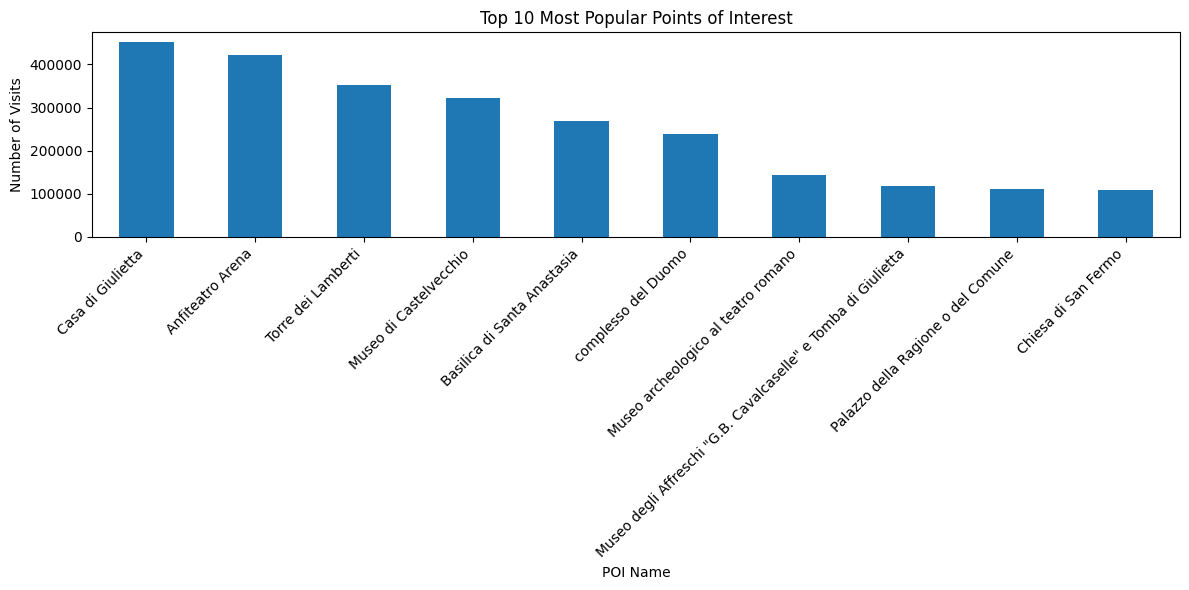

In [ ]:
# Most popular POIs
plt.figure(figsize=(12, 6))
popular_pois.plot(kind='bar')
plt.title('Top 10 Most Popular Points of Interest')
plt.xlabel('POI Name')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
# Average number of places visited per visitor
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, f'Average Places Visited: {avg_places_visited:.2f}',
         horizontalalignment='center', verticalalignment='center', fontsize=20)
plt.axis('off')
plt.show()



In [ ]:
# Display results
print("Most Popular POIs:")
print(popular_pois)

Most Popular POIs:
poi_name
Casa di Giulietta                                                 451755
Anfiteatro Arena                                                  421410
Torre dei Lamberti                                                352064
Museo di Castelvecchio                                            321349
Basilica di Santa Anastasia                                       269348
complesso del Duomo                                               238794
Museo archeologico al teatro romano                               143017
Museo degli Affreschi "G.B. Cavalcaselle" e Tomba di Giulietta    118643
Palazzo della Ragione o del Comune                                111438
Chiesa di San Fermo                                               109047
Name: count, dtype: int64


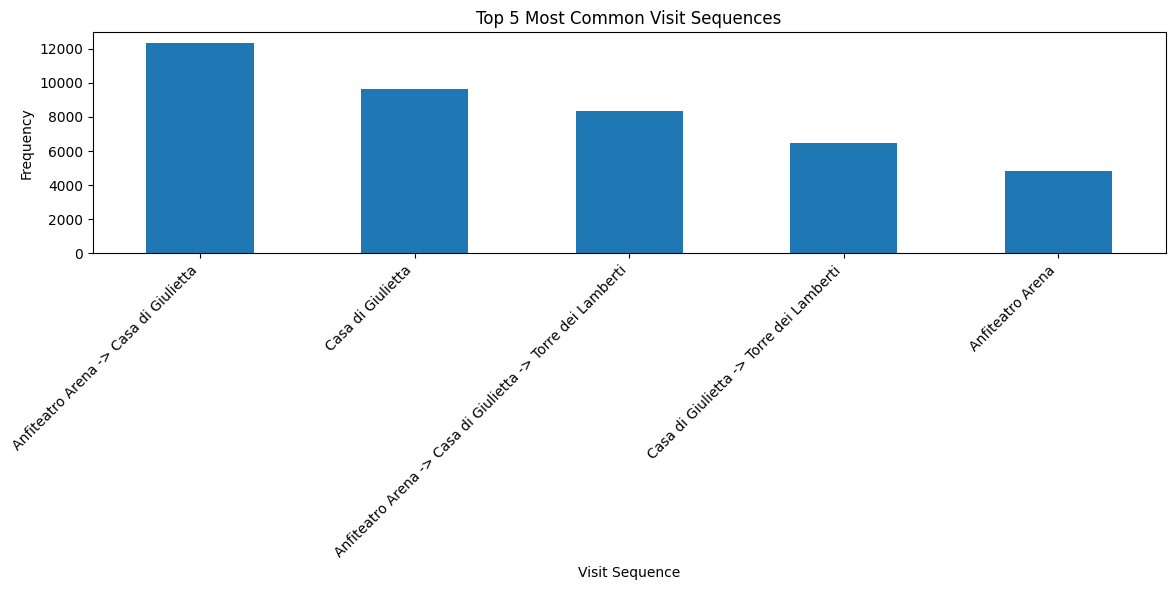

In [ ]:
# Most common visit sequences
plt.figure(figsize=(12, 6))
common_sequences.plot(kind='bar')
plt.title('Top 5 Most Common Visit Sequences')
plt.xlabel('Visit Sequence')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
print("\nBusiest Hours of the Day:")
print(busiest_hours)



Busiest Hours of the Day:
visit_timestamp
8      10147
9      83125
10    258626
11    382204
12    371053
13    329265
14    369718
15    387139
16    329268
17    193399
18     56259
19       181
20         5
21         5
22         5
Name: count, dtype: int64


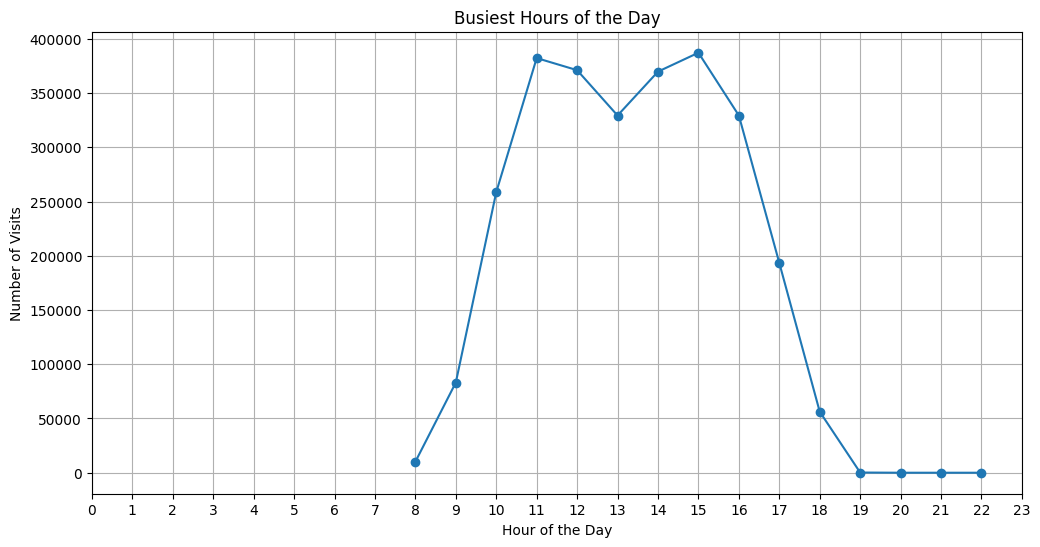

In [ ]:
# Busiest hours of the day
plt.figure(figsize=(12, 6))
busiest_hours.plot(kind='line', marker='o')
plt.title('Busiest Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



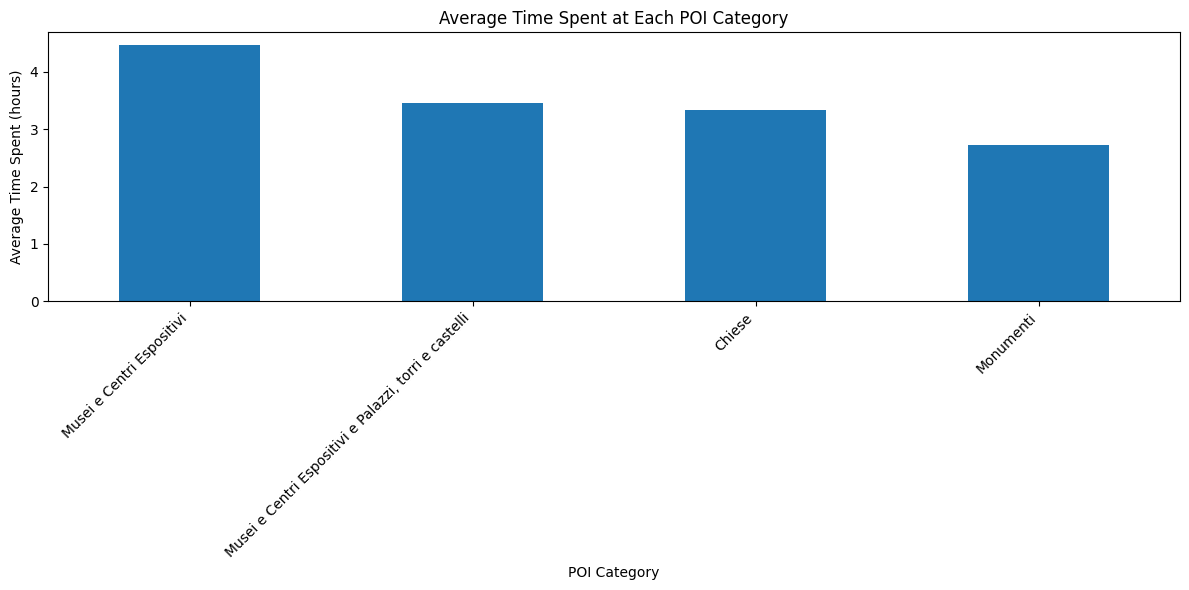

In [ ]:
#  Average time spent at each POI category
plt.figure(figsize=(12, 6))
avg_time_per_category.plot(kind='bar')
plt.title('Average Time Spent at Each POI Category')
plt.xlabel('POI Category')
plt.ylabel('Average Time Spent (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
print("\nAverage Number of Places Visited per Visitor:", avg_places_visited)
print("\nMost Common Visit Sequences:")
print(common_sequences)



Average Number of Places Visited per Visitor: 4.603142451459186

Most Common Visit Sequences:
Anfiteatro Arena -> Casa di Giulietta                          12336
Casa di Giulietta                                               9634
Anfiteatro Arena -> Casa di Giulietta -> Torre dei Lamberti     8324
Casa di Giulietta -> Torre dei Lamberti                         6486
Anfiteatro Arena                                                4846
Name: count, dtype: int64


In [ ]:
# Calculate average time spent per category
avg_time_per_category = df_sorted.groupby('category_name')['time_spent'].mean().sort_values(ascending=False)

def format_time(decimal_hours):
    hours = int(decimal_hours)
    minutes = round((decimal_hours - hours) * 60)
    if minutes == 60:  # Handle case where rounding results in 60 minutes
        hours += 1
        minutes = 0
    return f"{hours} hour{'s' if hours != 1 else ''} and {minutes} minute{'s' if minutes != 1 else ''}"

# Apply formatting to the average times
formatted_time = avg_time_per_category.apply(format_time)

print("\nAverage Time Spent at Each POI Category:")
for category, time in formatted_time.items():
    print(f"{category}: {time}")



Average Time Spent at Each POI Category:
Musei e Centri Espositivi: 4 hours and 28 minutes
Musei e Centri Espositivi e Palazzi, torri e castelli: 3 hours and 28 minutes
Chiese: 3 hours and 20 minutes
Monumenti: 2 hours and 44 minutes


In [ ]:
# Visitor Segmentation based on visitation patterns
def categorize_visitor(visited_places):
    if visited_places <= 2:
        return 'Casual'
    elif visited_places <= 5:
        return 'Interested'
    else:
        return 'Enthusiast'

df_sorted['visitor_category'] = df_sorted['visited_places'].apply(categorize_visitor)

visitor_segments = df_sorted.groupby('id_vc')['visitor_category'].first().value_counts()
print("Visitor Segments:")
print(visitor_segments)



Visitor Segments:
visitor_category
Interested    322827
Enthusiast    183401
Casual         93113
Name: count, dtype: int64


2024-08-03 13:06:16,613 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
2024-08-03 13:06:16,614 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
2024-08-03 13:06:16,614 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-08-03 13:06:16,614 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', siz

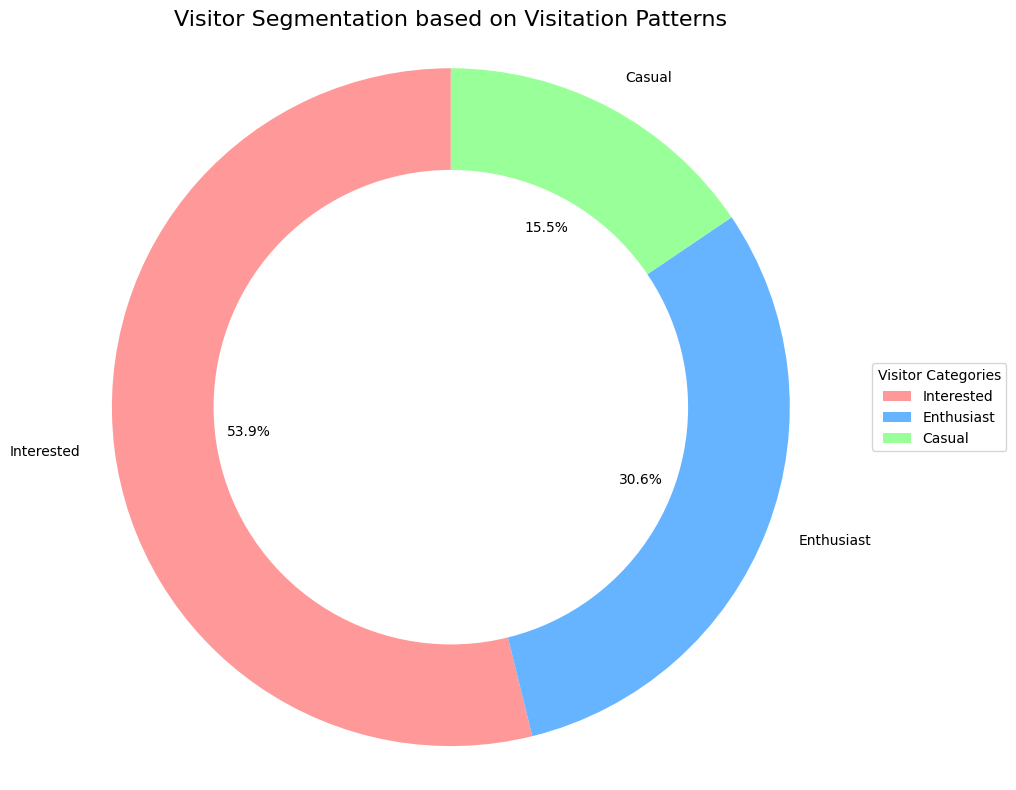


Visitor Segments:
Interested: 322827 (53.9%)
Enthusiast: 183401 (30.6%)
Casual: 93113 (15.5%)


In [ ]:
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(visitor_segments.values, labels=visitor_segments.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Visitor Segmentation based on Visitation Patterns', fontsize=16)

# Add a circle at the center to make it a donut chart
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a legend
plt.legend(title="Visitor Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print the exact numbers
print("\nVisitor Segments:")
for category, count in visitor_segments.items():
    percentage = (count / visitor_segments.sum()) * 100
    print(f"{category}: {count} ({percentage:.1f}%)")

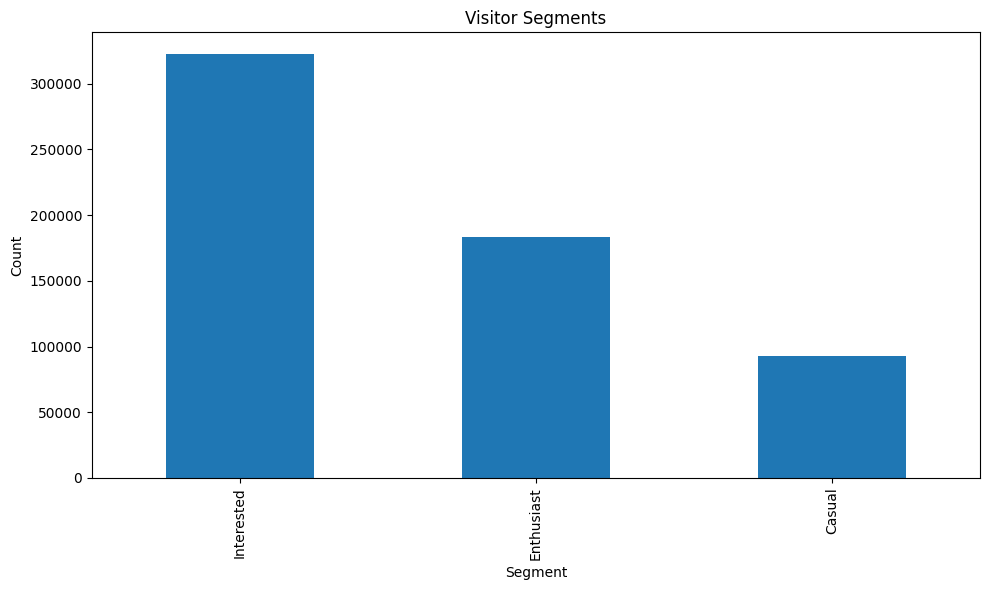

In [ ]:
# Visitor Segments
plt.figure(figsize=(10, 6))
visitor_segments.plot(kind='bar')
plt.title('Visitor Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [ ]:
# Popular POI combinations
poi_combinations = df_sorted.groupby('id_vc')['poi_name'].agg(lambda x: tuple(sorted(set(x))))
popular_combinations = Counter(poi_combinations).most_common(10)

2024-08-03 15:23:12,682 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-03 15:23:12,686 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-03 15:23:12,693 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-08-03 15:23:12,696 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
2024-08-03 15:23:12,697 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-08-03 15:23:12,698 - DEBUG - findfon

2024-08-03 15:23:12,809 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-08-03 15:23:12,810 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
2024-08-03 15:23:12,811 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-08-03 15:23:12,811 - DEBUG - findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', siz

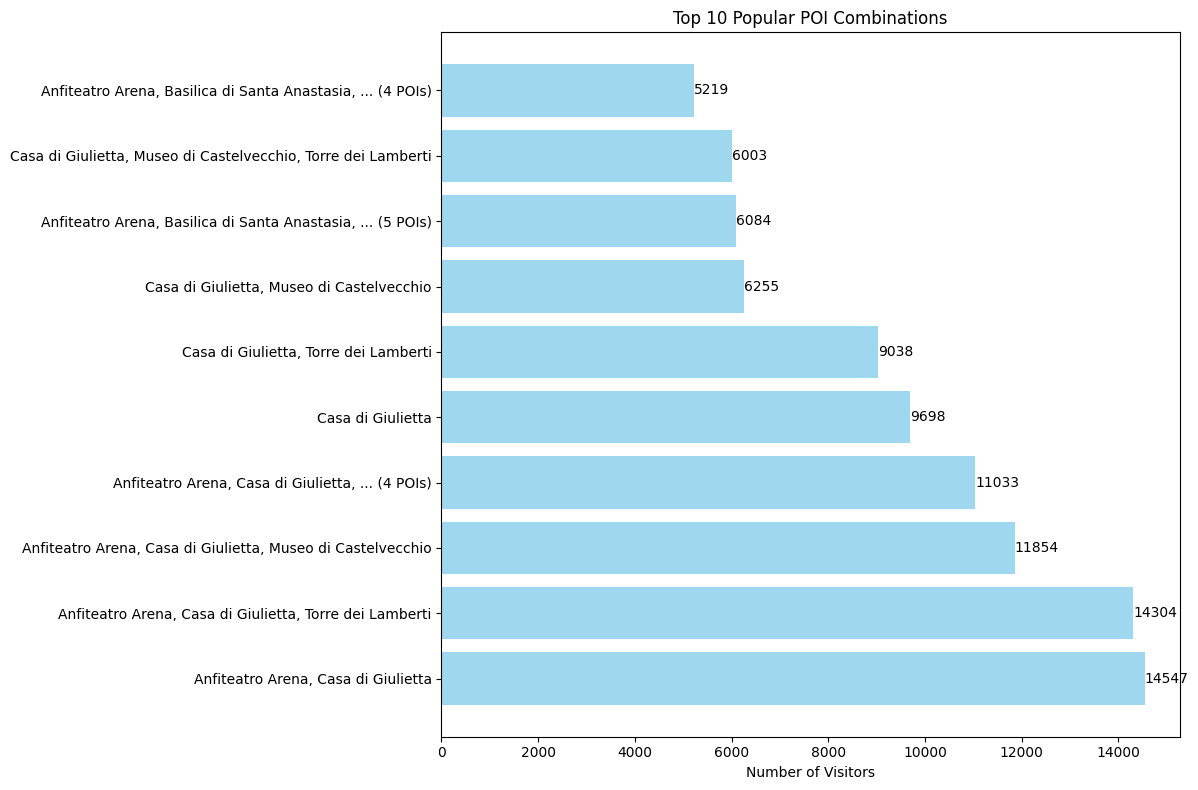


Top 10 Popular POI Combinations:
Anfiteatro Arena, Casa di Giulietta: 14547
Anfiteatro Arena, Casa di Giulietta, Torre dei Lamberti: 14304
Anfiteatro Arena, Casa di Giulietta, Museo di Castelvecchio: 11854
Anfiteatro Arena, Casa di Giulietta, ... (4 POIs): 11033
Casa di Giulietta: 9698
Casa di Giulietta, Torre dei Lamberti: 9038
Casa di Giulietta, Museo di Castelvecchio: 6255
Anfiteatro Arena, Basilica di Santa Anastasia, ... (5 POIs): 6084
Casa di Giulietta, Museo di Castelvecchio, Torre dei Lamberti: 6003
Anfiteatro Arena, Basilica di Santa Anastasia, ... (4 POIs): 5219


In [ ]:
def format_combo(combo):
    if len(combo) > 3:
        return ', '.join(combo[:2]) + f', ... ({len(combo)} POIs)'
    return ', '.join(combo)

# Prepare data for plotting
combos = [format_combo(combo) for combo, _ in popular_combinations]
counts = [count for _, count in popular_combinations]

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(combos))
plt.barh(y_pos, counts, align='center', alpha=0.8, color='skyblue')
plt.yticks(y_pos, combos)
plt.xlabel('Number of Visitors')
plt.title('Top 10 Popular POI Combinations')

# Add value labels on the bars
for i, v in enumerate(counts):
    plt.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()

# Print the exact numbers
print("\nTop 10 Popular POI Combinations:")
for combo, count in popular_combinations:
    print(f"{format_combo(combo)}: {count}")

In [ ]:
# Visitor flow analysis
poi_flow = df_sorted.groupby('id_vc')['poi_name'].agg(list)
poi_transitions = Counter((poi, next_poi) for visit in poi_flow for poi, next_poi in zip(visit, visit[1:]))
top_transitions = pd.DataFrame(poi_transitions.most_common(10), columns=['Transition', 'Count'])
print("\nTop 10 POI Transitions:")
print(top_transitions)




Top 10 POI Transitions:
                                          Transition   Count
0              (Anfiteatro Arena, Casa di Giulietta)  154716
1            (Casa di Giulietta, Torre dei Lamberti)  131293
2  (Basilica di Santa Anastasia, complesso del Du...  102241
3  (Torre dei Lamberti, Basilica di Santa Anastasia)   69019
4         (Anfiteatro Arena, Museo di Castelvecchio)   62334
5  (Torre dei Lamberti, Palazzo della Ragione o d...   59307
6   (Casa di Giulietta, Basilica di Santa Anastasia)   58627
7            (Torre dei Lamberti, Casa di Giulietta)   55790
8             (Anfiteatro Arena, Torre dei Lamberti)   50211
9  (complesso del Duomo, Museo archeologico al te...   36319


<ipython-input-172-dcff66f2002c>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


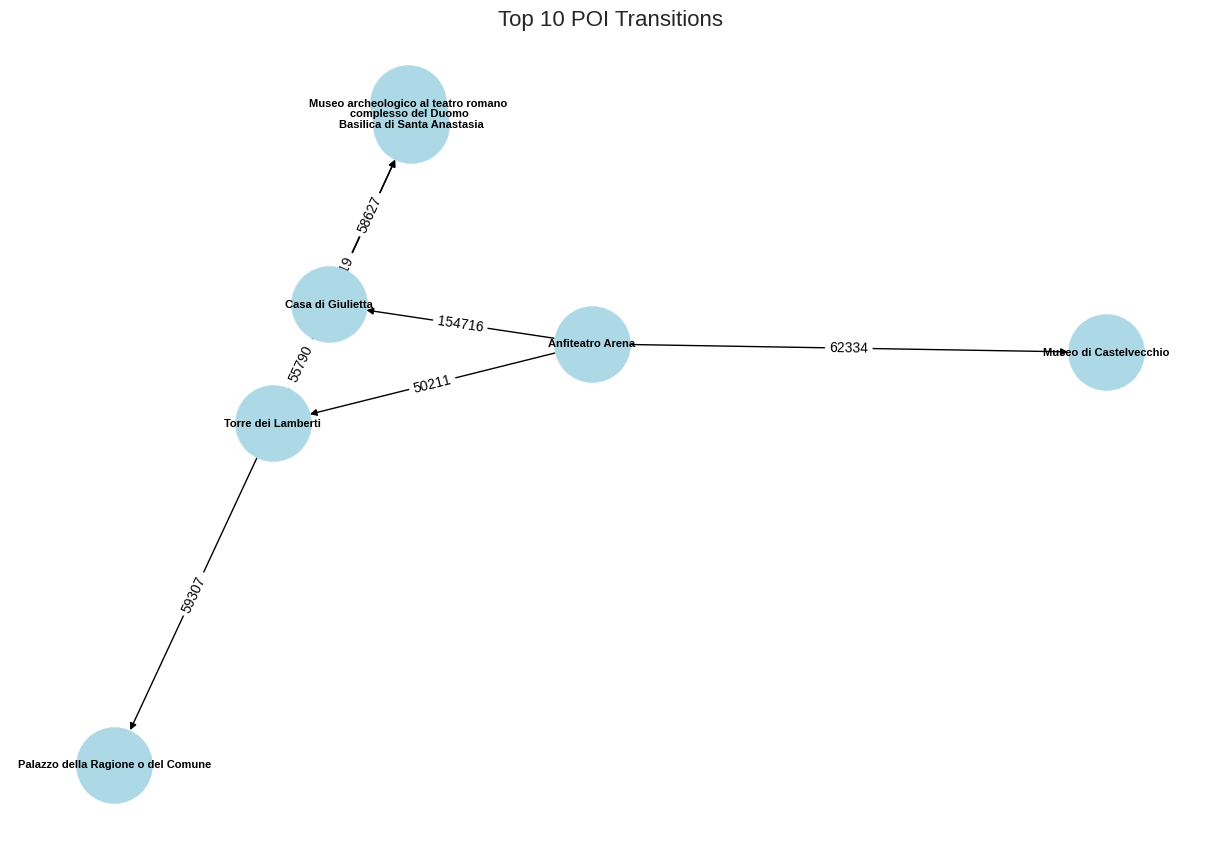


Top 10 POI Transitions:
                                          Transition   Count  \
0              (Anfiteatro Arena, Casa di Giulietta)  154716   
1            (Casa di Giulietta, Torre dei Lamberti)  131293   
2  (Basilica di Santa Anastasia, complesso del Du...  102241   
3  (Torre dei Lamberti, Basilica di Santa Anastasia)   69019   
4         (Anfiteatro Arena, Museo di Castelvecchio)   62334   
5  (Torre dei Lamberti, Palazzo della Ragione o d...   59307   
6   (Casa di Giulietta, Basilica di Santa Anastasia)   58627   
7            (Torre dei Lamberti, Casa di Giulietta)   55790   
8             (Anfiteatro Arena, Torre dei Lamberti)   50211   
9  (complesso del Duomo, Museo archeologico al te...   36319   

                          From                                   To  
0             Anfiteatro Arena                    Casa di Giulietta  
1            Casa di Giulietta                   Torre dei Lamberti  
2  Basilica di Santa Anastasia                  complesso de

In [ ]:
# Create a new DataFrame with separate 'From' and 'To' columns
df_transitions = pd.DataFrame(poi_transitions.most_common(10), columns=['Transition', 'Count'])
df_transitions[['From', 'To']] = pd.DataFrame(df_transitions['Transition'].tolist(), index=df_transitions.index)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in df_transitions.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Count'])

# Set up the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, font_size=8, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Add a title
plt.title("Top 10 POI Transitions", fontsize=16)

plt.axis('off')
plt.tight_layout()
plt.show()

# Print the transition data
print("\nTop 10 POI Transitions:")
print(df_transitions)

In [ ]:
# Time-based popularity of POIs
df_sorted['hour'] = df_sorted['visit_timestamp'].dt.hour
hourly_popularity = df_sorted.groupby(['poi_name', 'hour'])['id_vc'].count().unstack()

# Fill NaN values with 0 (assuming NaN means no visits)
hourly_popularity = hourly_popularity.fillna(0)

# Calculate total visits for each POI
total_visits = hourly_popularity.sum(axis=1).sort_values(ascending=False)

# Select top 5 most visited POIs for visualization
top_5_pois = total_visits.head(5).index




In [ ]:
# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of POIs: {len(hourly_popularity)}")
print(f"Total number of visits: {hourly_popularity.values.sum():,}")
print("\nTop 5 Most Visited POIs:")
for poi, visits in total_visits.head().items():
    print(f"{poi}: {visits:,} visits")

print("\nPeak Hours (across all POIs):")
peak_hours = overall_hourly_popularity.nlargest(3)
for hour, visits in peak_hours.items():
    print(f"{hour}:00 - {visits:,} visits")


Summary Statistics:
Total number of POIs: 17
Total number of visits: 2,770,399.0

Top 5 Most Visited POIs:
Casa di Giulietta: 451,755.0 visits
Anfiteatro Arena: 421,410.0 visits
Torre dei Lamberti: 352,064.0 visits
Museo di Castelvecchio: 321,349.0 visits
Basilica di Santa Anastasia: 269,348.0 visits

Peak Hours (across all POIs):
15:00 - 387,139.0 visits
11:00 - 382,204.0 visits
12:00 - 371,053.0 visits


2024-08-03 14:26:37,114 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f3972f69a80>


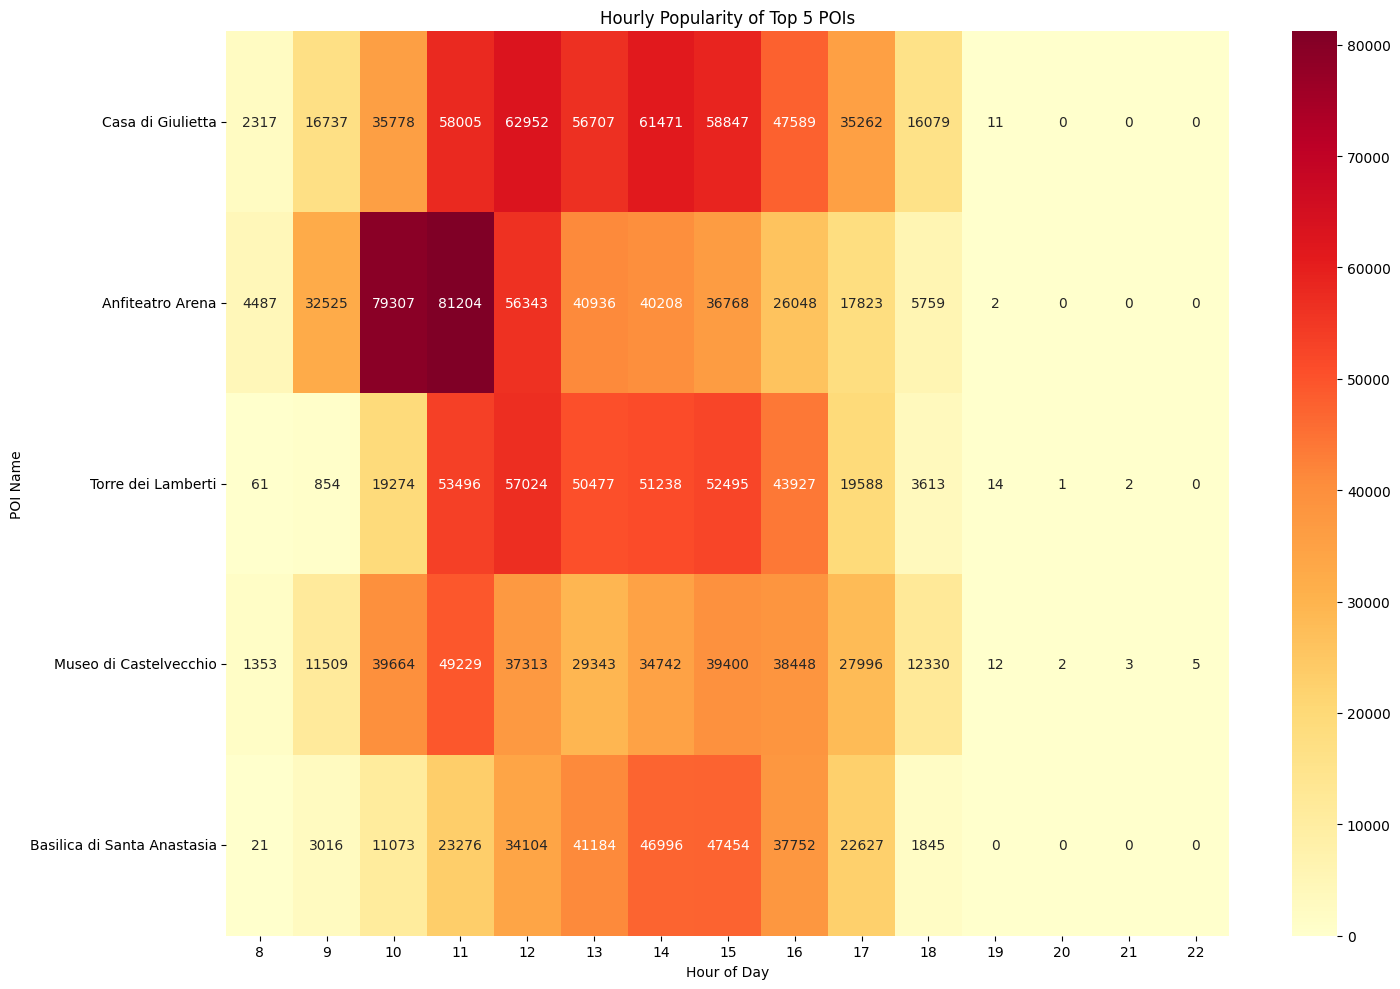

In [ ]:
# Create a heatmap for the top 5 POIs
plt.figure(figsize=(15, 10))
sns.heatmap(hourly_popularity.loc[top_5_pois], cmap="YlOrRd", annot=True, fmt="g")
plt.title("Hourly Popularity of Top 5 POIs")
plt.ylabel("POI Name")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()



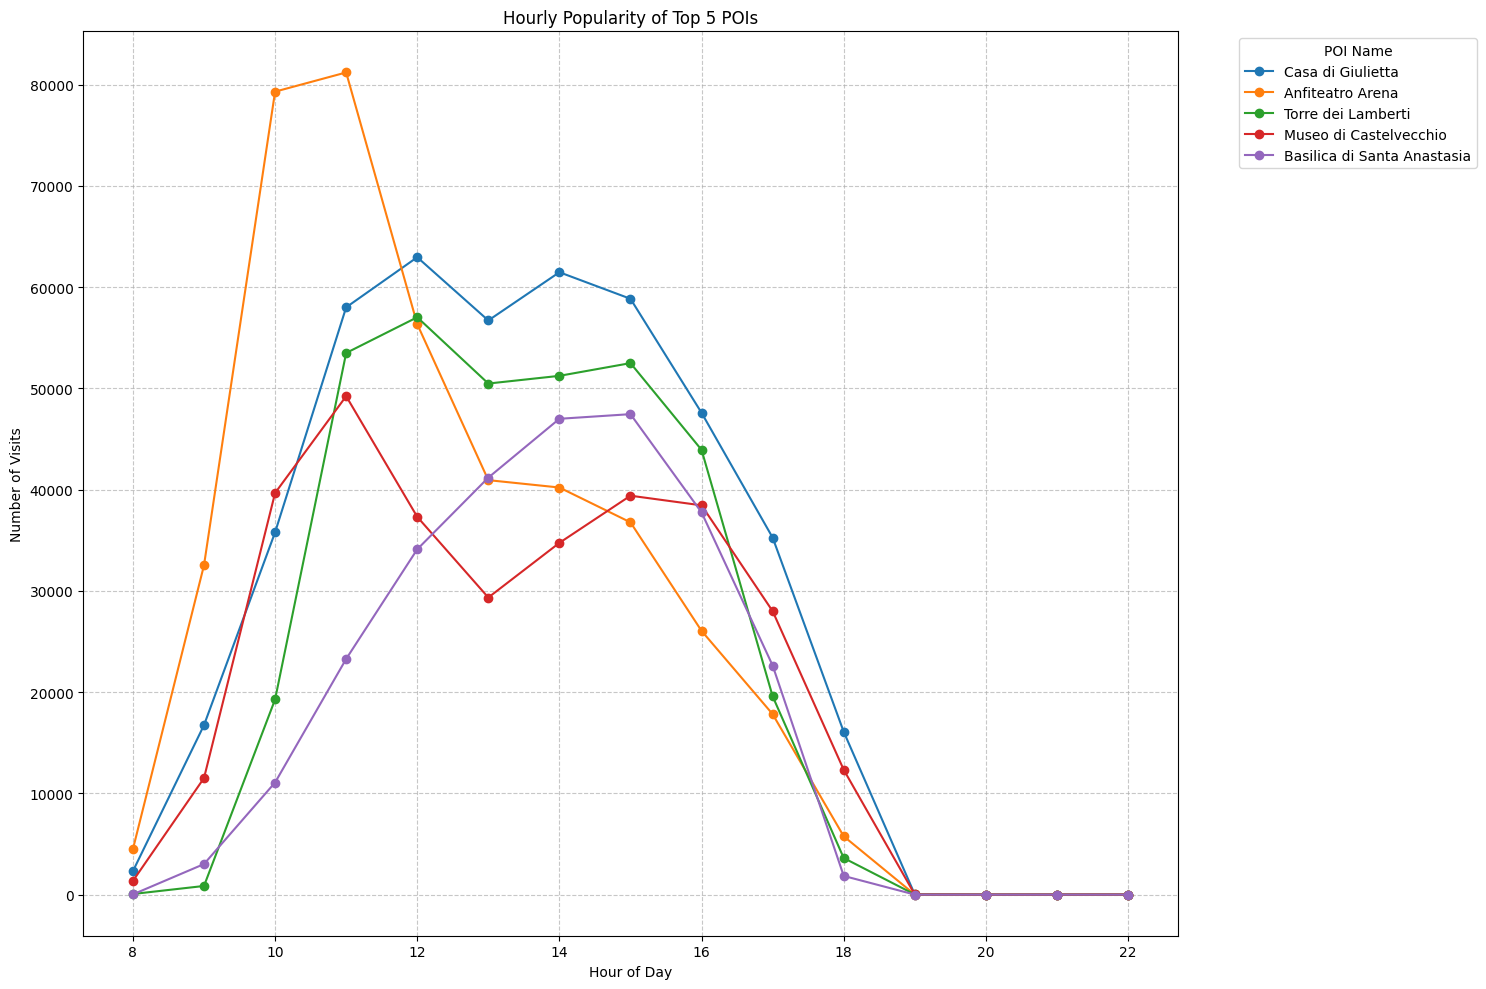

In [ ]:
# Create line plots for the top 5 POIs
plt.figure(figsize=(15, 10))
for poi in top_5_pois:
    plt.plot(hourly_popularity.columns, hourly_popularity.loc[poi], label=poi, marker='o')
plt.title("Hourly Popularity of Top 5 POIs")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Visits")
plt.legend(title="POI Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



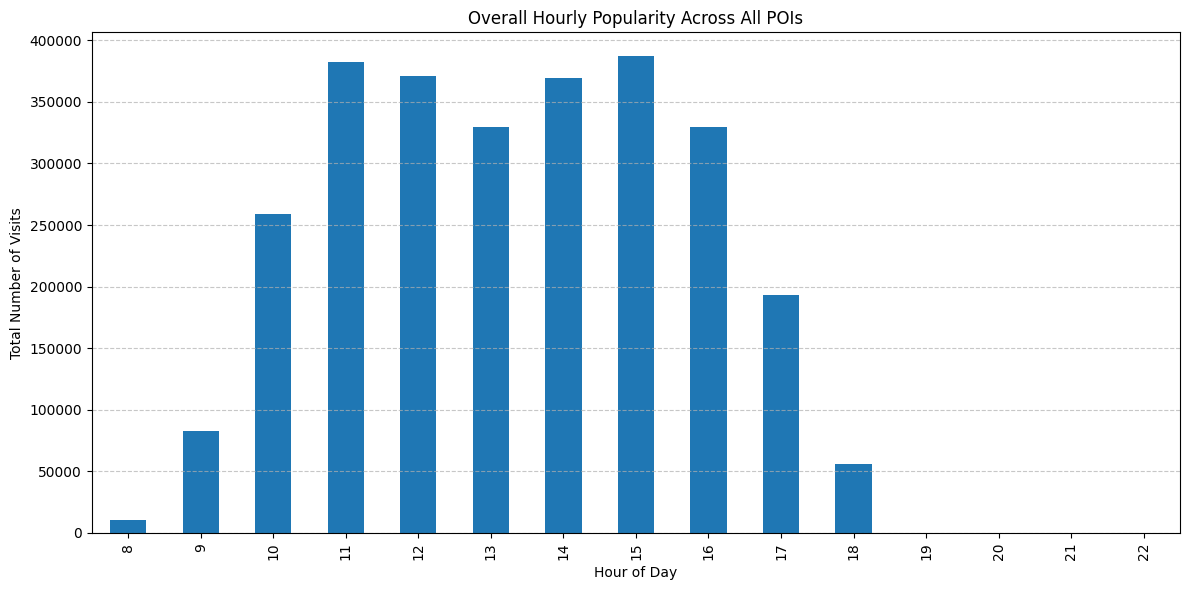

In [ ]:
# Calculate the overall hourly popularity across all POIs
overall_hourly_popularity = hourly_popularity.sum()
plt.figure(figsize=(12, 6))
overall_hourly_popularity.plot(kind='bar')
plt.title("Overall Hourly Popularity Across All POIs")
plt.xlabel("Hour of Day")
plt.ylabel("Total Number of Visits")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Seasonal trends
seasonal_trends = df_sorted.groupby(['season', 'poi_name'])['id_vc'].count().unstack()


# Calculate total visits for each POI
total_visits = seasonal_trends.sum().sort_values(ascending=False)

# Select top 10 most visited POIs
top_10_pois = total_visits.head(10).index


2024-08-03 14:29:04,195 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f3972b57130>


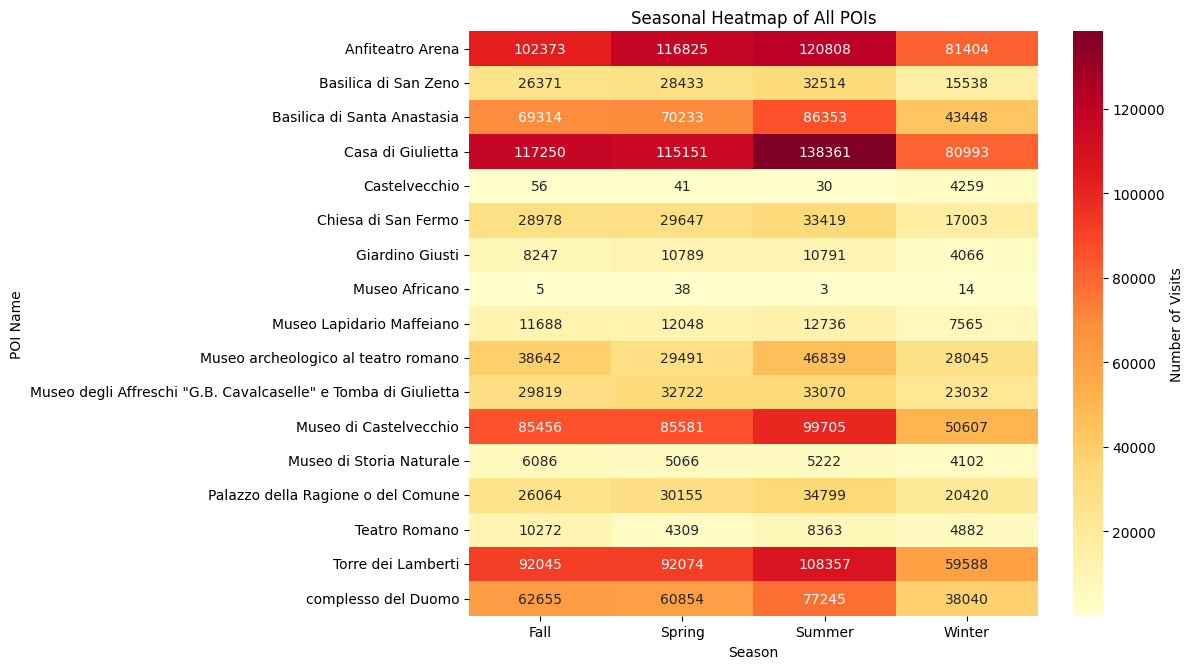

In [ ]:
# Heatmap for all POIs across seasons
plt.figure(figsize=(12, len(seasonal_trends.columns) * 0.4))
sns.heatmap(seasonal_trends.T, cmap="YlOrRd", annot=True, fmt="g", cbar_kws={'label': 'Number of Visits'})
plt.title("Seasonal Heatmap of All POIs")
plt.ylabel("POI Name")
plt.xlabel("Season")
plt.tight_layout()
plt.show()



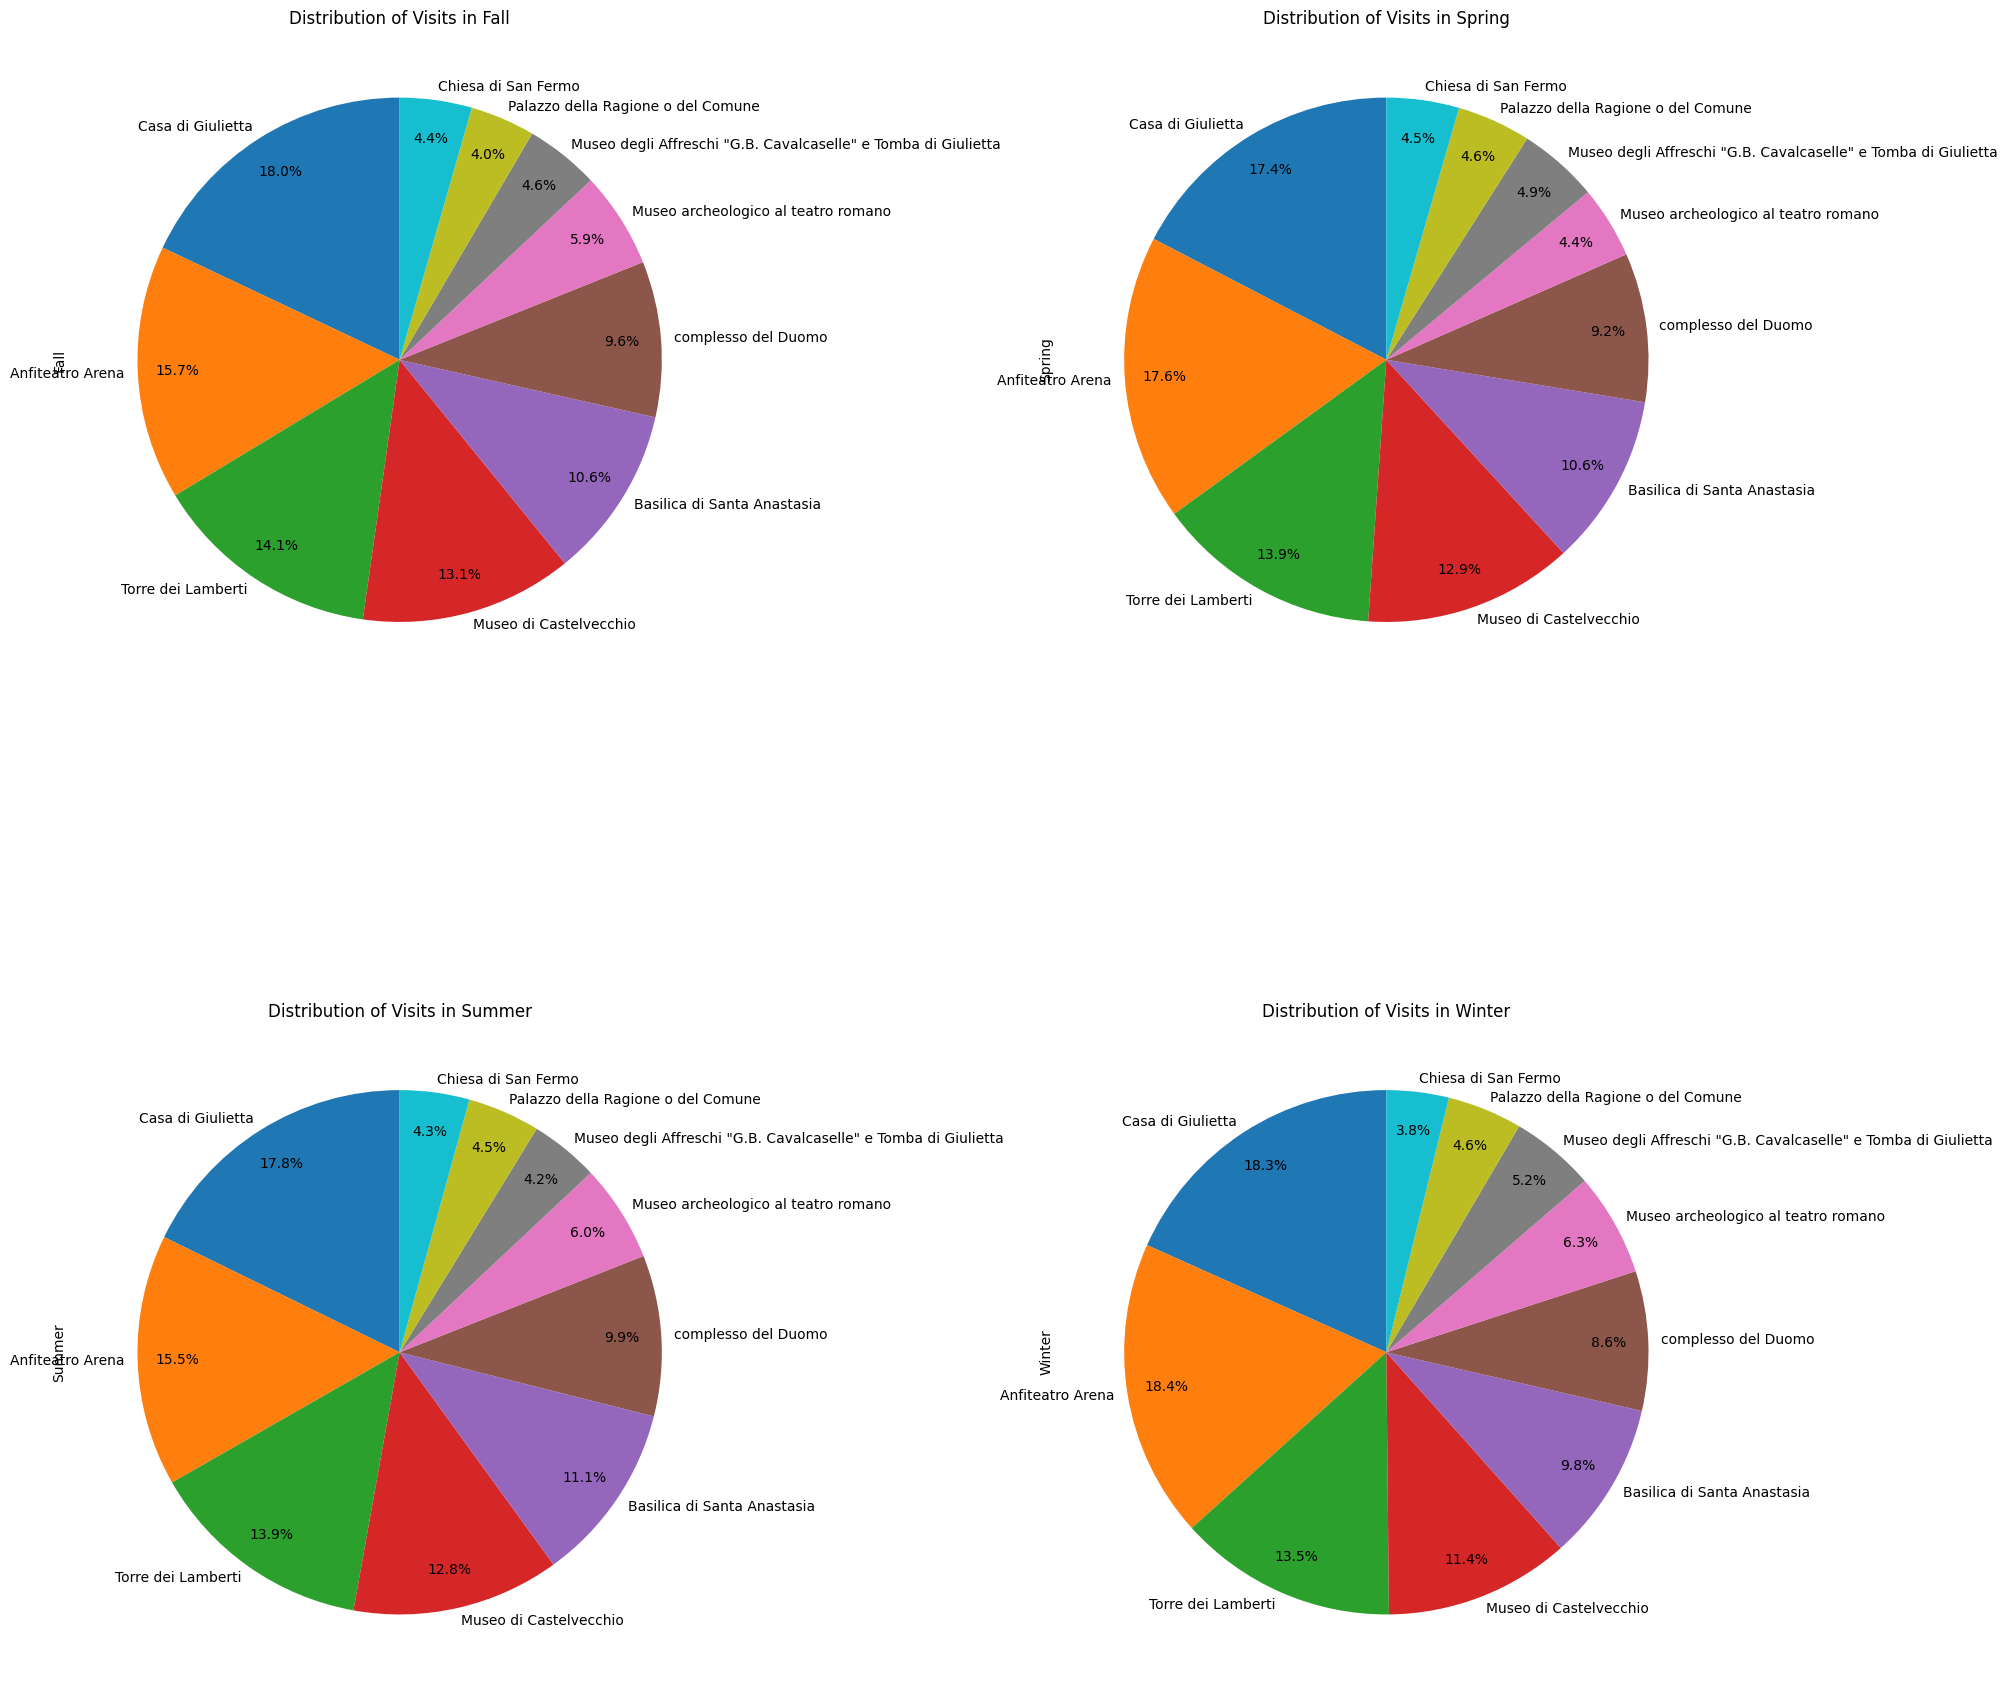

In [ ]:
# Pie charts for each season
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
seasons = seasonal_trends.index
for i, season in enumerate(seasons):
    ax = axs[i // 2, i % 2]
    seasonal_trends.loc[season, top_10_pois].plot.pie(
        autopct='%1.1f%%', ax=ax, startangle=90,
        pctdistance=0.85, labeldistance=1.05
    )
    ax.set_title(f"Distribution of Visits in {season}")
plt.tight_layout()
plt.show()



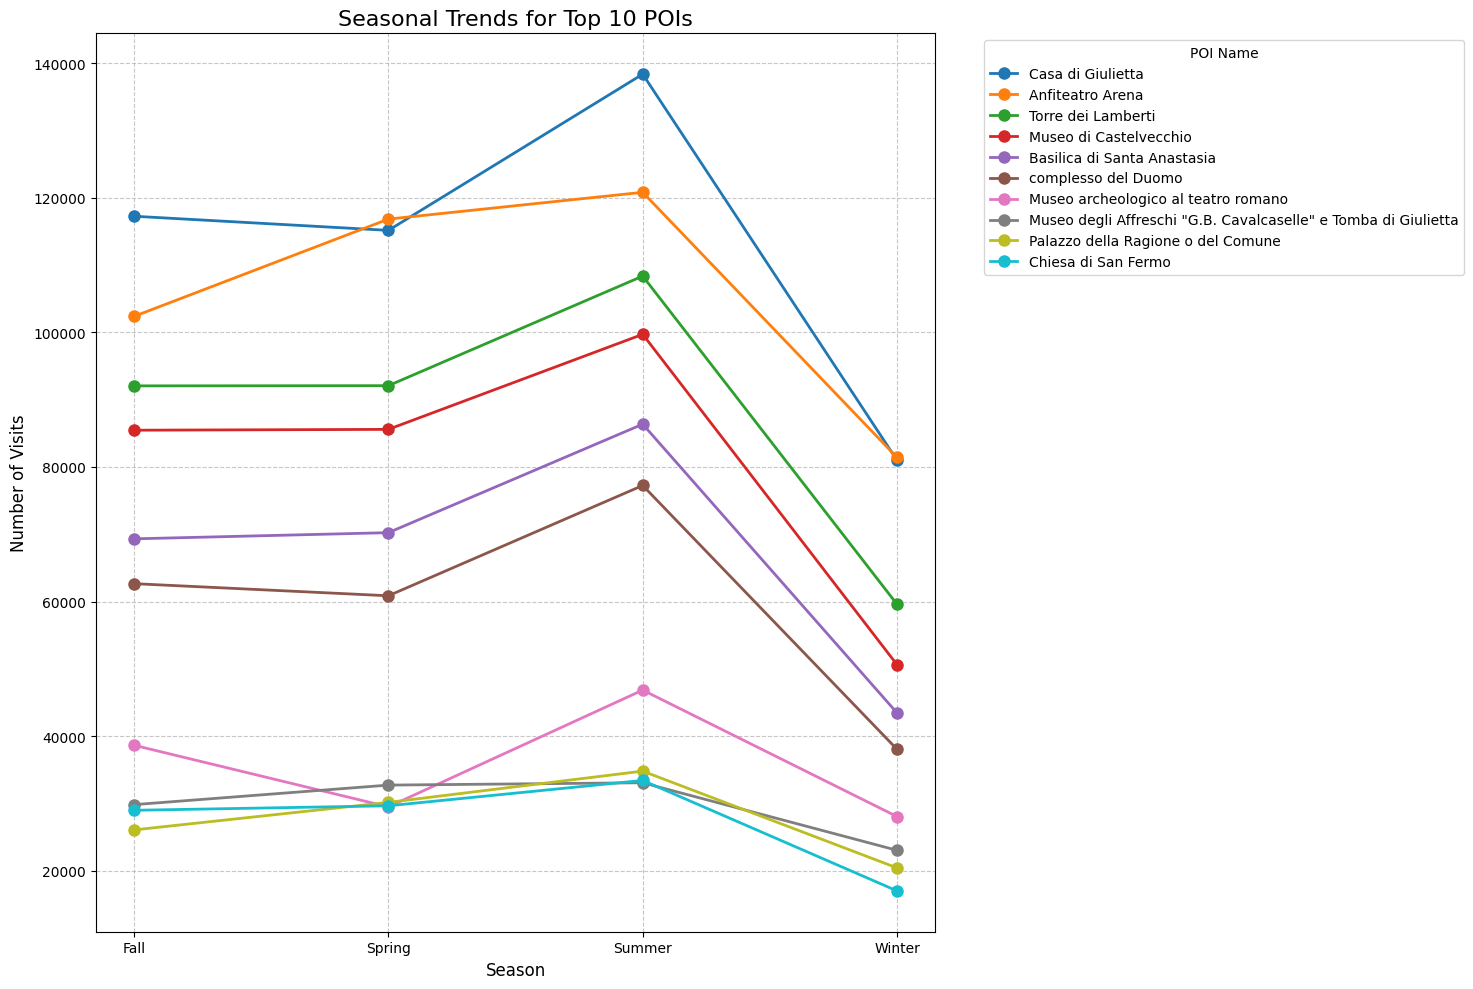

In [ ]:
# Line plot for top 10 POIs across seasons
plt.figure(figsize=(15, 10))
for poi in top_10_pois:
    plt.plot(seasonal_trends.index, seasonal_trends[poi], marker='o', linewidth=2, markersize=8, label=poi)

plt.title("Seasonal Trends for Top 10 POIs", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)
plt.legend(title="POI Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of POIs: {len(seasonal_trends.columns)}")
print(f"Total number of visits: {seasonal_trends.values.sum():,}")

print("\nTop 5 Most Visited POIs Overall:")
for poi, visits in total_visits.head().items():
    print(f"{poi}: {visits:,} visits")

print("\nMost Popular Season for Each Top 5 POI:")
for poi in total_visits.head().index:
    most_popular_season = seasonal_trends[poi].idxmax()
    visits = seasonal_trends.loc[most_popular_season, poi]
    print(f"{poi}: {most_popular_season} ({visits:,} visits)")

print("\nOverall Most Popular Season:")
overall_seasonal_popularity = seasonal_trends.sum(axis=1)
most_popular_season = overall_seasonal_popularity.idxmax()
print(f"{most_popular_season}: {overall_seasonal_popularity[most_popular_season]:,} total visits")


Summary Statistics:
Total number of POIs: 17
Total number of visits: 2,770,399

Top 5 Most Visited POIs Overall:
Casa di Giulietta: 451,755 visits
Anfiteatro Arena: 421,410 visits
Torre dei Lamberti: 352,064 visits
Museo di Castelvecchio: 321,349 visits
Basilica di Santa Anastasia: 269,348 visits

Most Popular Season for Each Top 5 POI:
Casa di Giulietta: Summer (138,361 visits)
Anfiteatro Arena: Summer (120,808 visits)
Torre dei Lamberti: Summer (108,357 visits)
Museo di Castelvecchio: Summer (99,705 visits)
Basilica di Santa Anastasia: Summer (86,353 visits)

Overall Most Popular Season:
Summer: 848,615 total visits


In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770399 entries, 2172725 to 2765888
Data columns (total 21 columns):
 #   Column             Dtype          
---  ------             -----          
 0   activation_date    object         
 1   id_vc              object         
 2   visit_timestamp    datetime64[ns] 
 3   profile_vc         object         
 4   poi                int64          
 5   poi_name           object         
 6   category_id        int64          
 7   category_name      object         
 8   longitude          float64        
 9   latitude           float64        
 10  visited_places     int64          
 11  visit_order        int64          
 12  is_night           bool           
 13  season             object         
 14  is_weekend         bool           
 15  time_to_next       timedelta64[ns]
 16  distance_to_next   float64        
 17  distance_category  object         
 18  time_spent         float64        
 19  hour               int32          
 20  v

In [ ]:
df_sorted.head().T

,2172725,1511855,681585,1271263,2578699
activation_date,2017-06-17,2017-06-17,2017-06-17,2017-06-17,2018-04-29
id_vc,0400003A9C4C85,0400003A9C4C85,0400003A9C4C85,0400003A9C4C85,040000429C4C85
visit_timestamp,2017-06-17 11:04:00,2017-06-17 11:52:00,2017-06-17 14:53:00,2017-06-17 15:37:00,2018-04-29 17:51:00
profile_vc,vrcard2-24,vrcard2-24,vrcard2-24,vrcard2-24,vrcard2-48
poi,59,49,54,75,42
poi_name,Torre dei Lamberti,Anfiteatro Arena,Basilica di Santa Anastasia,Giardino Giusti,Museo archeologico al teatro romano
category_id,2,2,1,2,4
category_name,Monumenti,Monumenti,Chiese,Monumenti,Musei e Centri Espositivi
longitude,10.997661,10.994672,10.999825,11.007161,11.00186
latitude,45.442963,45.439116,45.445176,45.443667,45.44708


In [ ]:
df_sorted.isna().sum()

activation_date           0
id_vc                     0
visit_timestamp           0
profile_vc                6
poi                       0
poi_name                  0
category_id               0
category_name             0
longitude                 0
latitude                  0
visited_places            0
visit_order               0
is_night                  0
season                    0
is_weekend                0
time_to_next         599341
distance_to_next     599341
distance_category    599341
time_spent           599341
hour                      0
visitor_category          0
dtype: int64

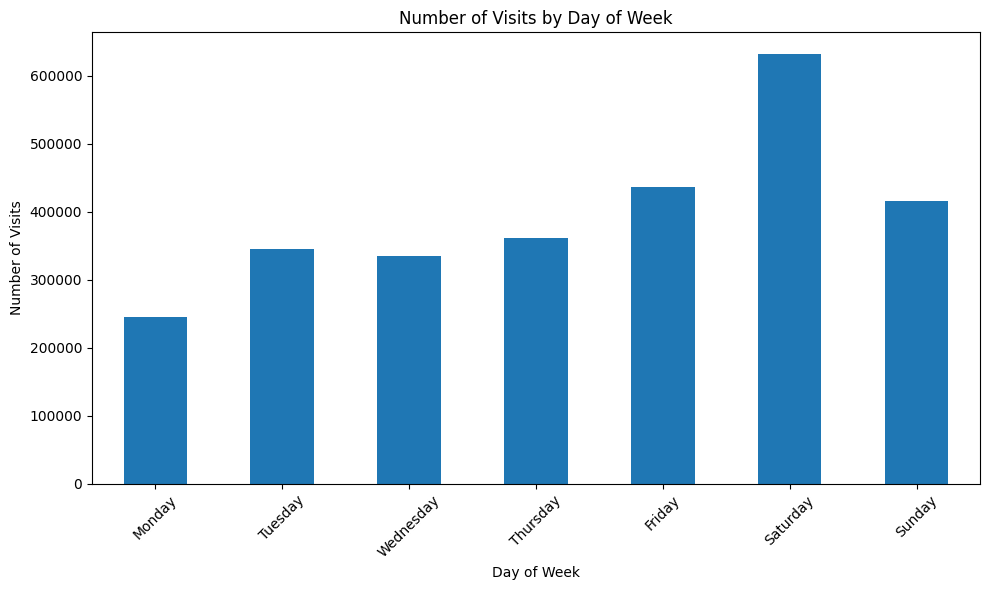

In [ ]:
#  Visits by Day of Week
df_sorted['day_of_week'] = df_sorted['visit_timestamp'].dt.dayofweek
day_counts = df_sorted['day_of_week'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Number of Visits by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Visits')
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipykernel_1288/2692671622.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sorted, x='visit_timestamp', shade=True)


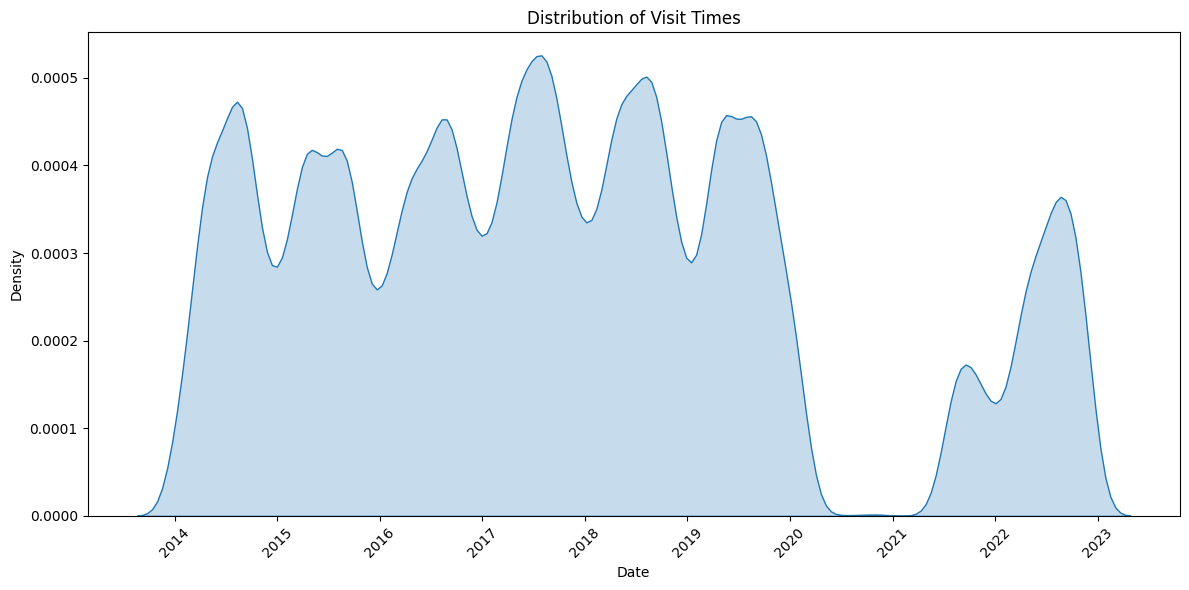

In [ ]:
# Visit Time Distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_sorted, x='visit_timestamp', shade=True)
plt.title('Distribution of Visit Times')
plt.xlabel('Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



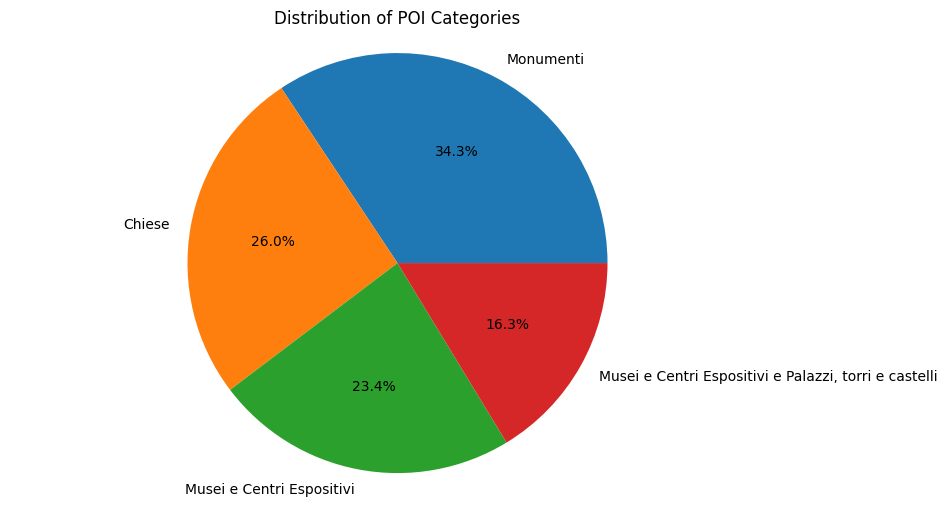

In [ ]:
# POI Category Distribution
category_counts = df_sorted['category_name'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of POI Categories')
plt.ylabel('')
plt.axis('equal')
plt.show()



In [ ]:
def show_visited_places(id_vc):
    # Filter the dataframe for the given id_vc
    id_vc_df = df_sorted[df_sorted['id_vc'] == id_vc]

    # Check if the id_vc is available
    if id_vc_df.empty:
        print(f"No visits found for id_vc '{id_vc}'")
    else:
        # Print the information about visited places
        print(f"Visited places for id_vc '{id_vc}':")
        for index, row in id_vc_df.iterrows():
            print(f"Visit {row['visit_order']}:")
            print(f"- Place: {row['poi_name']}")
            print(f"- Category: {row['category_name']}")
            print(f"- Visit Timestamp: {row['visit_timestamp']}")
            print(f"- Location: ({row['longitude']}, {row['latitude']})")
            print()

In [ ]:
# Get id_vc from user input
id_vc_input = input("Enter the id_vc: ")

# Call the function with the user input
show_visited_places(id_vc_input)

Visited places for id_vc '0400003A9C4C85':
Visit 1:
- Place: Torre dei Lamberti
- Category: Monumenti
- Visit Timestamp: 2017-06-17 11:04:00
- Location: (10.9976605, 45.4429629)

Visit 2:
- Place: Anfiteatro Arena
- Category: Monumenti
- Visit Timestamp: 2017-06-17 11:52:00
- Location: (10.994672, 45.439116)

Visit 3:
- Place: Basilica di Santa Anastasia
- Category: Chiese
- Visit Timestamp: 2017-06-17 14:53:00
- Location: (10.999825, 45.445176)

Visit 4:
- Place: Giardino Giusti
- Category: Monumenti
- Visit Timestamp: 2017-06-17 15:37:00
- Location: (11.0071608, 45.4436667)



In [ ]:
def show_visited_places_on_map(id_vc):
    # Filter the dataframe for the given id_vc
    id_vc_df = df[df['id_vc'] == id_vc]

    # Check if the id_vc is available
    if id_vc_df.empty:
        print(f"No visits found for id_vc '{id_vc}'")
    else:
        # Sort the dataframe by 'visit_timestamp' for the given id_vc
        id_vc_df = id_vc_df.sort_values(by='visit_timestamp')

        # Add a visit number based on the timestamp
        id_vc_df['visit_number'] = range(1, len(id_vc_df) + 1)

        # Initialize the map centered at Verona
        verona_map = folium.Map(location=[45.4384, 10.9916], zoom_start=13)

        # Define colors for lines
        colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
                  'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
                  'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
                  'gray', 'black', 'lightgray']

        # Add markers and lines between visited places
        previous_location = None
        legend_items = []
        for index, row in id_vc_df.iterrows():
            popup_text = f"<b>Visit Number:</b> {row['visit_number']}<br>"
            popup_text += f"<b>Place:</b> {row['poi_name']}<br>"
            popup_text += f"<b>Category:</b> {row['category_name']}<br>"
            popup_text += f"<b>Visit Timestamp:</b> {row['visit_timestamp']}<br>"
            popup_text += f"<b>Location:</b> ({row['latitude']}, {row['longitude']})"
            folium.Marker(
                location=[row['latitude'], row['longitude']],
                popup=folium.Popup(popup_text, max_width=300),
                icon=folium.Icon(color='blue')
            ).add_to(verona_map)

            # Add line between places with different colors
            if previous_location:
                visit_number = row['visit_number']
                line_color = colors[(visit_number - 2) % len(colors)]  # Subtract 2 to start from the first color
                folium.PolyLine(locations=[previous_location, [row['latitude'], row['longitude']]],
                                color=line_color,
                                weight=5,
                                opacity=0.8).add_to(verona_map)
                legend_items.append((f"Visit {visit_number - 1} to {visit_number}", line_color))

            # Update previous location
            previous_location = [row['latitude'], row['longitude']]

        # Add legend to map
        legend_html = '<div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: auto; max-height: 300px; overflow-y: auto; '
        legend_html += 'border:2px solid grey; z-index:9999; font-size:12px; background-color:white;">'
        legend_html += '&nbsp; <b>Visit Legend</b> <br>'
        for item, color in legend_items:
            legend_html += f'<i style="background:{color}; width: 15px; height: 15px; display: inline-block;"></i>&nbsp; {item} <br>'
        legend_html += '</div>'
        verona_map.get_root().html.add_child(folium.Element(legend_html))

        # Display the map
        display(verona_map)

# Get id_vc from user input
id_vc_input = input("Enter the id_vc: ")

# Call the function to show visited places on map
show_visited_places_on_map(id_vc_input)

# Invers IRL

In [ ]:
def safe_log(x):
    return np.log(np.maximum(x, 1e-300))

def preprocess_data(df):
    logger.info("Preprocessing data...")

    # Check data types and process only if necessary
    for column in ['time_to_next', 'distance_to_next', 'time_spent']:
        if df[column].isnull().any():
            logger.info(f"Handling NaN values in {column}")
            df[column].fillna(df[column].mean(), inplace=True)

    if df['distance_category'].isnull().any():
        logger.info("Handling NaN values in distance_category")
        df['distance_category'].fillna(df['distance_category'].mode()[0], inplace=True)

    # Convert categorical variables to numeric only if they're not already numeric
    for column in ['season', 'distance_category', 'visitor_category']:
        if not pd.api.types.is_numeric_dtype(df[column]):
            logger.info(f"Converting {column} to numeric")
            df[column] = pd.Categorical(df[column]).codes

    # Handle 'time_to_next' based on its data type
    if pd.api.types.is_datetime64_any_dtype(df['time_to_next']):
        logger.info("Converting 'time_to_next' from datetime to seconds")
        df['time_to_next'] = df['time_to_next'].dt.total_seconds()
    elif pd.api.types.is_timedelta64_dtype(df['time_to_next']):
        logger.info("Converting 'time_to_next' from timedelta to seconds")
        df['time_to_next'] = df['time_to_next'].dt.total_seconds()
    else:
        logger.info("'time_to_next' is already in a numeric format. No conversion needed.")

    return df



In [ ]:
def setup_data(df_sorted):
    logger.info("Setting up data...")

    # Preprocess the data
    df_sorted = preprocess_data(df_sorted)

    # Create a mapping of POIs to state indices
    unique_pois = df_sorted['poi'].unique()
    poi_to_state = {poi: idx for idx, poi in enumerate(unique_pois)}
    n_states = len(unique_pois)
    logger.debug(f"Number of states: {n_states}")

    # Select features for the IRL model

    # feature_columns = ['category_id', 'visited_places', 'is_night', 'season', 'is_weekend',
    #                    'time_to_next', 'distance_to_next', 'time_spent', 'hour',
    #                    'visitor_category', 'visit_duration', 'day_of_week']

    feature_columns = ['category_id', 'visited_places', 'is_night', 'season', 'is_weekend',
                       'time_to_next', 'distance_to_next', 'time_spent', 'hour',
                       'visitor_category', 'day_of_week']

    # Create feature matrix
    features = df_sorted.groupby('poi')[feature_columns].mean().values

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    n_features = features.shape[1]
    logger.debug(f"Number of features: {n_features}")
    logger.debug(f"Feature matrix shape: {features.shape}")

    # Create trajectories
    logger.info("Creating trajectories...")
    trajectories = []
    grouped = df_sorted.groupby('id_vc')
    for _, group in tqdm(grouped, total=len(grouped), desc="Processing trajectories"):
        traj = [(poi_to_state[poi], 0, poi_to_state[poi]) for poi in group['poi']]
        trajectories.append(trajectory.Trajectory(traj))
    logger.debug(f"Number of trajectories: {len(trajectories)}")

    return poi_to_state, features, trajectories, n_states, n_features

In [ ]:
def create_transition_matrix(n_states):
    logger.info("Creating transition matrix...")
    n_actions = 1  # We only have one action (moving to the next POI)
    p_transition = np.zeros((n_states, n_states, n_actions))
    for s in range(n_states):
        p_transition[s, :, 0] = 1 / (n_states - 1)
        p_transition[s, s, 0] = 0  # Prevent self-transitions
        p_transition[s, :, 0] /= p_transition[s, :, 0].sum()  # Normalize
    logger.debug(f"Transition matrix shape: {p_transition.shape}")
    return p_transition, n_actions



In [ ]:
def run_maxent_irl(p_transition, features, terminal_states, trajectories, n_states):
    logger.info("Running MaxEnt IRL...")
    lr = 0.01
    optim = optimizer.ExpSga(lr).normalize_grad()
    init = optimizer.Uniform(-0.1, 0.1)
    eps = 1e-3
    eps_esvf = 1e-4
    try:
        reward = maxent.irl(p_transition, features, terminal_states, trajectories, optim, init, eps, eps_esvf)
        logger.debug(f"Reward shape: {reward.shape}")
        logger.debug(f"Reward min: {reward.min()}, max: {reward.max()}")
    except Exception as e:
        logger.error(f"Error during IRL: {e}")
        reward = np.zeros(n_states)
    return reward



In [ ]:
def compute_policy(p_transition, terminal_states, reward):
    logger.info("Computing policy...")
    try:
        policy = maxent.local_action_probabilities(p_transition, terminal_states, reward)
        logger.debug(f"Policy shape: {policy.shape}")
    except Exception as e:
        logger.error(f"Error computing policy: {e}")
        policy = np.ones((p_transition.shape[0], p_transition.shape[1], p_transition.shape[2])) / p_transition.shape[1]
    return policy



In [ ]:
def compute_svf(p_transition, p_initial, terminal_states, reward):
    logger.info("Computing expected state visitation frequency...")
    try:
        e_svf = maxent.compute_expected_svf(p_transition, p_initial, terminal_states, reward)
        logger.debug(f"E_SVF shape: {e_svf.shape}")
        logger.debug(f"E_SVF min: {e_svf.min()}, max: {e_svf.max()}")
    except Exception as e:
        logger.error(f"Error computing E_SVF: {e}")
        e_svf = np.zeros(p_transition.shape[0])
    return e_svf

In [ ]:
def visualize_results(reward, e_svf, n_states):
    logger.info("Visualizing results...")
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(n_states), reward)
    plt.xlabel('POI State')
    plt.ylabel('Reward')
    plt.title('Learned Rewards for POIs')
    plt.subplot(1, 2, 2)
    plt.bar(range(n_states), e_svf)
    plt.xlabel('POI State')
    plt.ylabel('Expected Visitation Frequency')
    plt.title('Expected State Visitation Frequency')
    plt.tight_layout()
    plt.show()



2024-08-03 15:37:08,562 - INFO - Starting main execution...
2024-08-03 15:37:08,563 - INFO - Setting up data...
2024-08-03 15:37:08,563 - INFO - Preprocessing data...
2024-08-03 15:37:08,572 - INFO - 'time_to_next' is already in a numeric format. No conversion needed.
2024-08-03 15:37:08,580 - DEBUG - Number of states: 17
2024-08-03 15:37:08,701 - DEBUG - Number of features: 11
2024-08-03 15:37:08,702 - DEBUG - Feature matrix shape: (17, 11)
2024-08-03 15:37:08,702 - INFO - Creating trajectories...
Processing trajectories: 100%|██████████| 599341/599341 [00:35<00:00, 17019.47it/s]
2024-08-03 15:37:48,166 - DEBUG - Number of trajectories: 599341
2024-08-03 15:37:48,388 - INFO - Data setup completed.
2024-08-03 15:37:48,389 - INFO - Creating transition matrix...
2024-08-03 15:37:48,390 - DEBUG - Transition matrix shape: (17, 17, 1)
2024-08-03 15:37:48,391 - INFO - Running MaxEnt IRL...
2024-08-03 15:37:50,358 - DEBUG - Reward shape: (17,)
2024-08-03 15:37:50,359 - DEBUG - Reward min: -0.

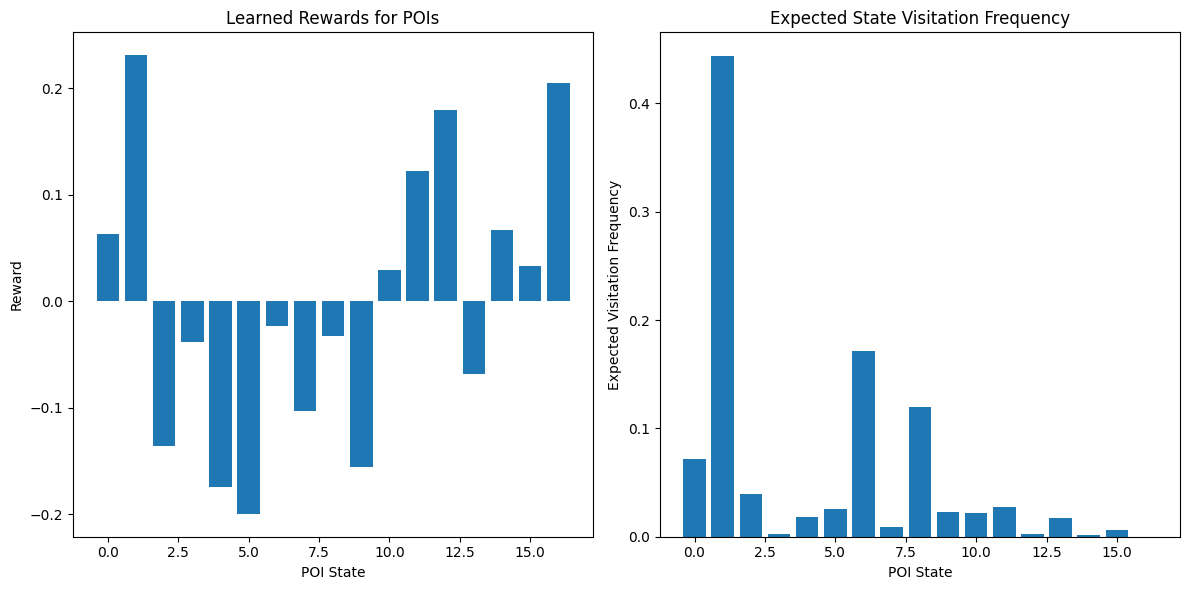

In [ ]:
logger.info("Starting main execution...")
poi_to_state, features, trajectories, n_states, n_features = setup_data(df_sorted)
logger.info("Data setup completed.")
p_transition, n_actions = create_transition_matrix(n_states)
terminal_states = list(range(n_states))  # Assume all states can be terminal
reward = run_maxent_irl(p_transition, features, terminal_states, trajectories, n_states)

# Print the learned reward for each POI
for poi, state in poi_to_state.items():
    logger.info(f"POI: {poi}, Reward: {reward[state]}")

# Find the POI with the highest reward
best_poi = max(poi_to_state.items(), key=lambda x: reward[x[1]])
logger.info(f"POI with highest reward: {best_poi[0]}, Reward: {reward[best_poi[1]]}")

policy = compute_policy(p_transition, terminal_states, reward)

# Compute initial state probabilities
p_initial = maxent.initial_probabilities_from_trajectories(n_states, trajectories)
logger.debug(f"Initial probabilities shape: {p_initial.shape}")

e_svf = compute_svf(p_transition, p_initial, terminal_states, reward)
visualize_results(reward, e_svf, n_states)

2024-08-03 15:39:36,680 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-08-03 15:39:36,688 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


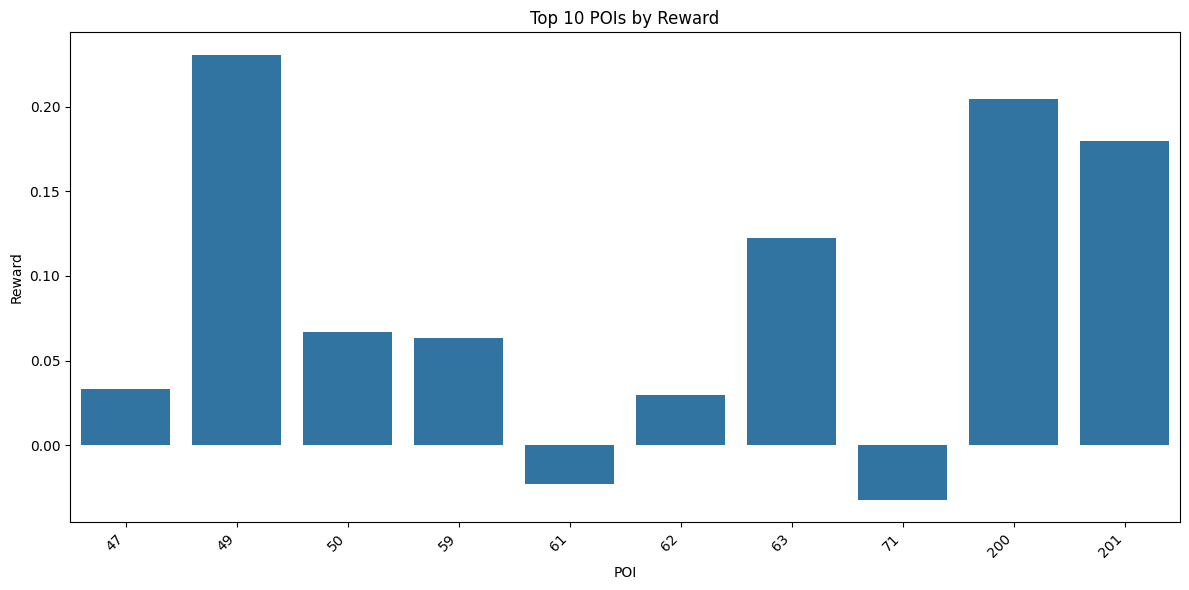

In [ ]:
# Top 10 POIs by Reward
state_to_poi = {state: poi for poi, state in poi_to_state.items()}
top_10_rewards = sorted([(state_to_poi[i], r) for i, r in enumerate(reward)], key=lambda x: x[1], reverse=True)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=[poi for poi, _ in top_10_rewards], y=[r for _, r in top_10_rewards])
plt.xlabel('POI')
plt.ylabel('Reward')
plt.title('Top 10 POIs by Reward')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



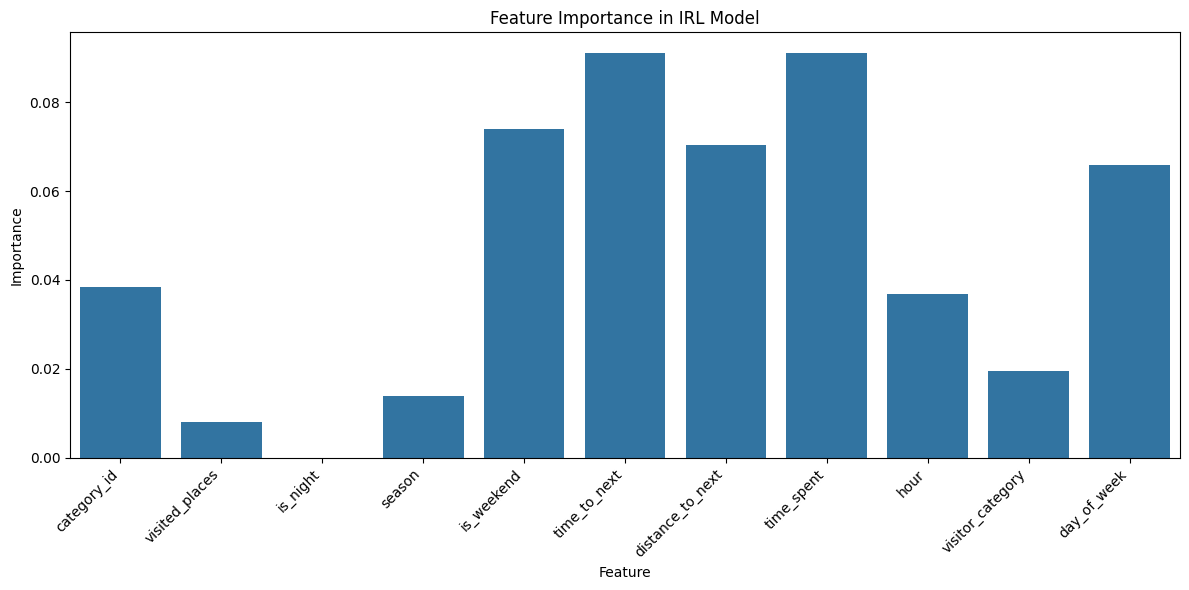

In [ ]:
# Feature Importance
# feature_names = ['category_id', 'visited_places', 'is_night', 'season', 'is_weekend',
#                     'time_to_next', 'distance_to_next', 'time_spent', 'hour',
#                     'visitor_category', 'visit_duration', 'day_of_week']
feature_names = ['category_id', 'visited_places', 'is_night', 'season', 'is_weekend',
                    'time_to_next', 'distance_to_next', 'time_spent', 'hour',
                    'visitor_category', 'day_of_week']
feature_importance = np.abs(np.mean(features * reward.reshape(-1, 1), axis=0))
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_names, y=feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in IRL Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


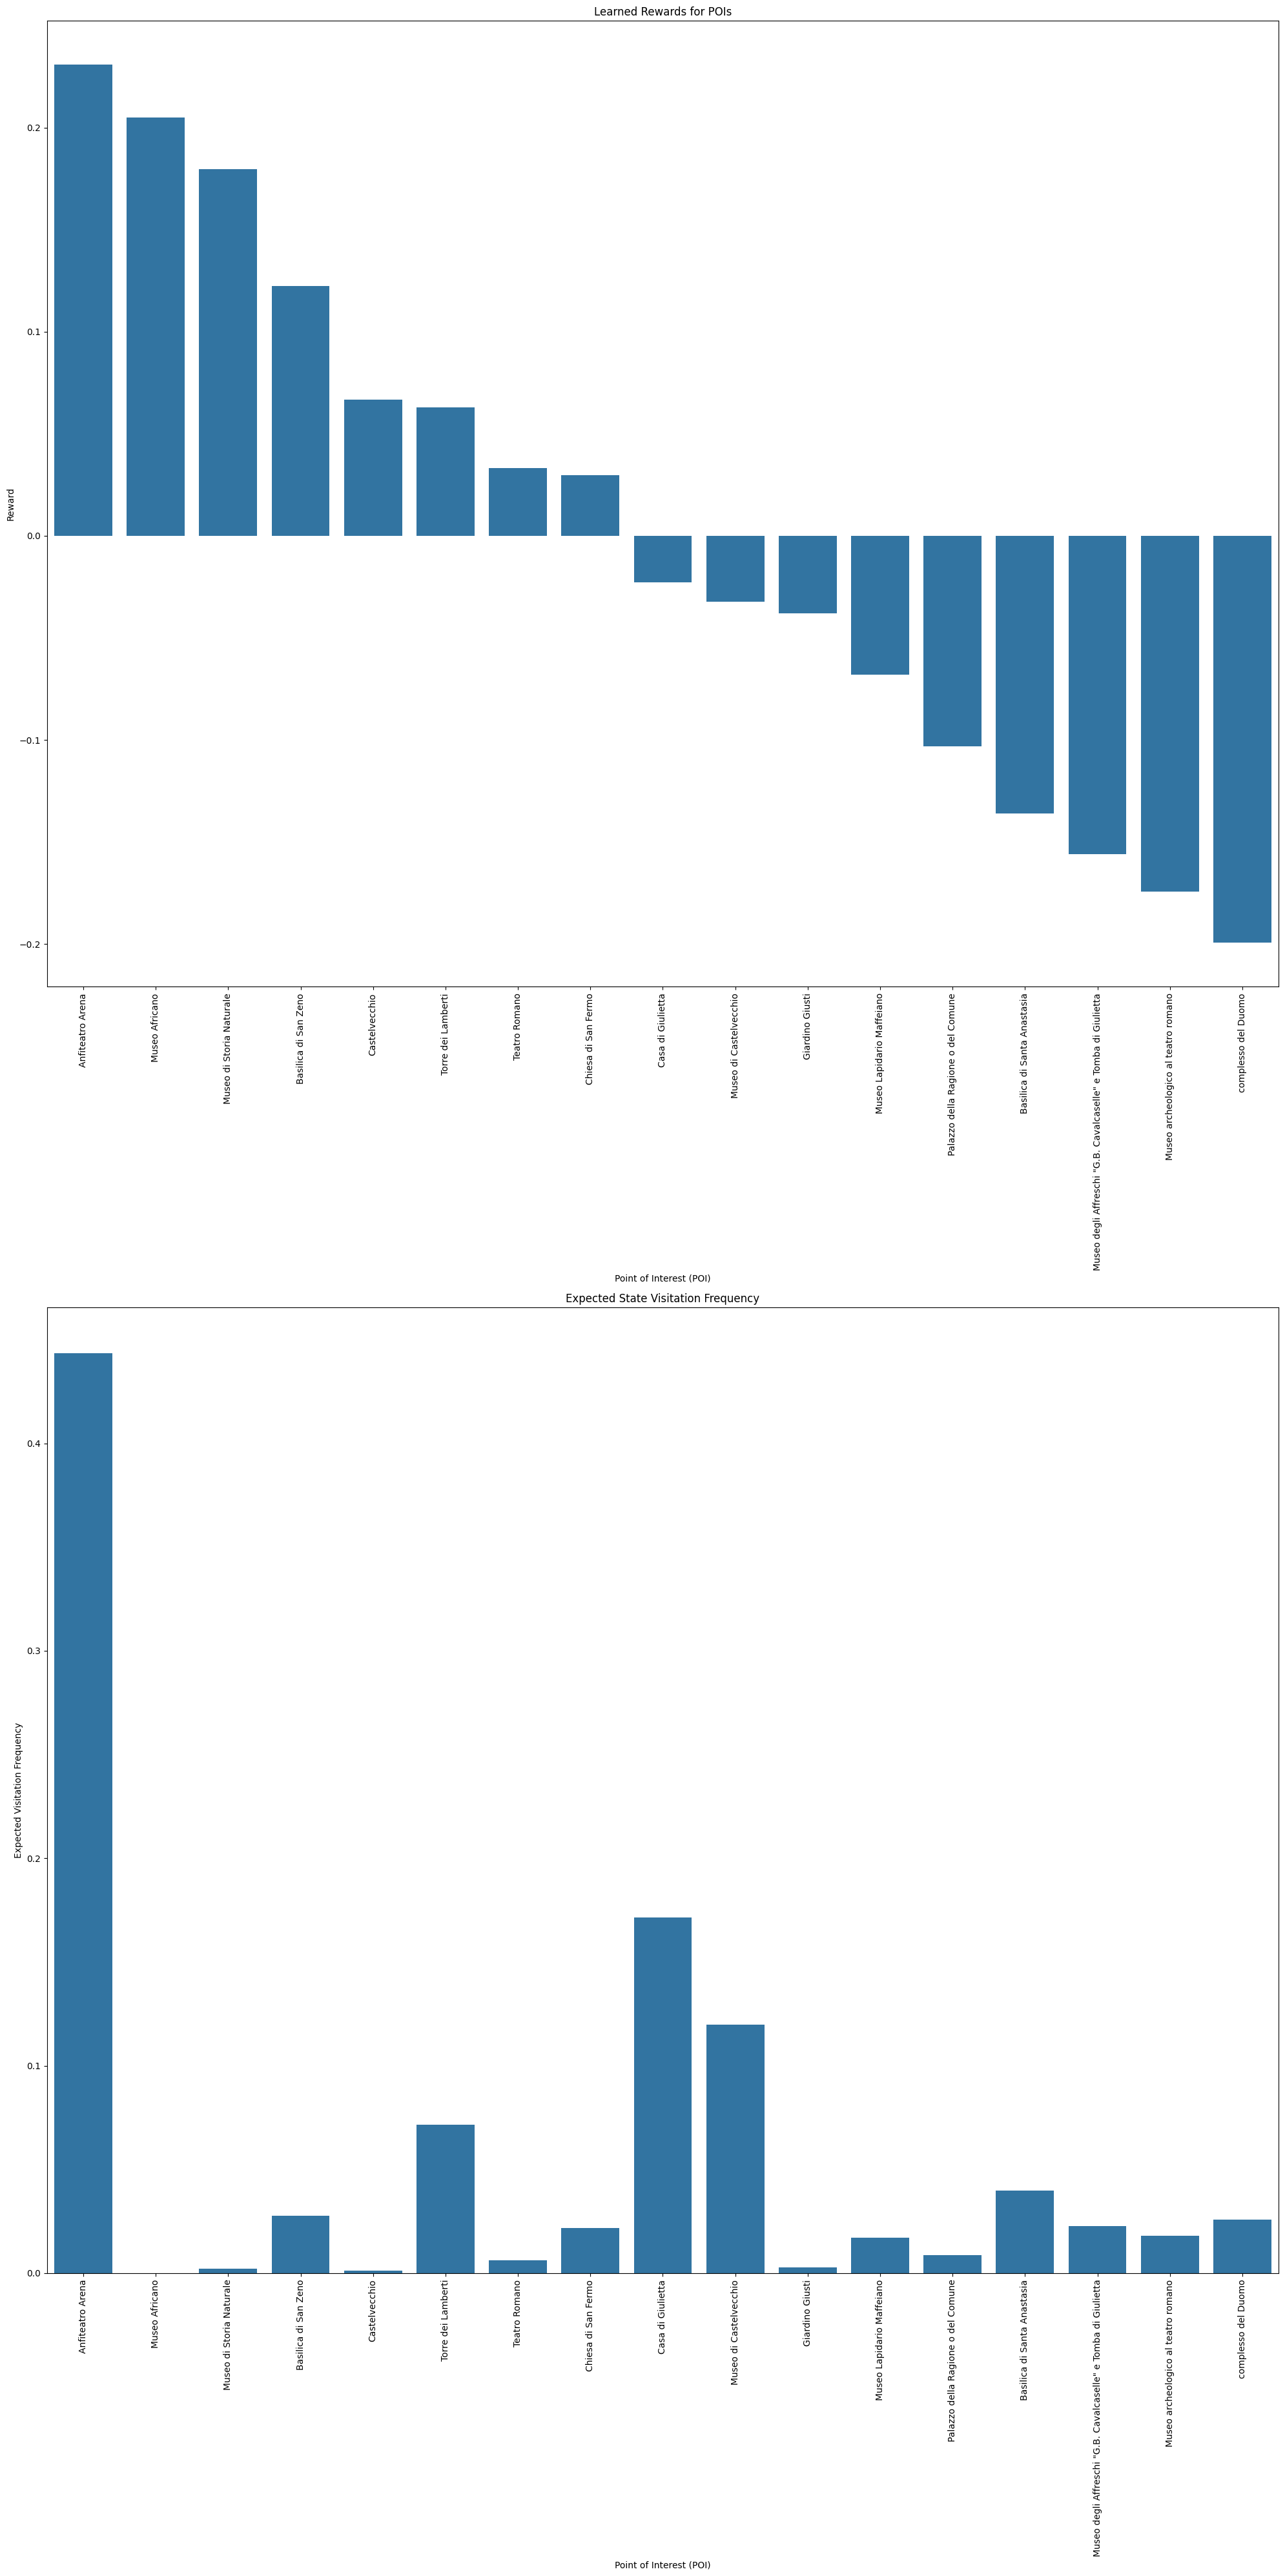

In [ ]:
# Create a mapping of state indices back to POI names
state_to_poi = {state: poi for poi, state in poi_to_state.items()}

# Create a DataFrame for visualization
viz_df = pd.DataFrame({
    'poi': [state_to_poi[i] for i in range(len(reward))],
    'reward': reward,
    'e_svf': e_svf
})

# Merge with original DataFrame to get poi_names
viz_df = viz_df.merge(df_sorted[['poi', 'poi_name']].drop_duplicates(), on='poi', how='left')

# Sort by reward for better visualization
viz_df = viz_df.sort_values('reward', ascending=False)

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 40))

# Learned Rewards for POIs
sns.barplot(x='poi_name', y='reward', data=viz_df, ax=ax1)
ax1.set_xlabel('Point of Interest (POI)')
ax1.set_ylabel('Reward')
ax1.set_title('Learned Rewards for POIs')
ax1.tick_params(axis='x', rotation=90)

# Expected State Visitation Frequency
sns.barplot(x='poi_name', y='e_svf', data=viz_df, ax=ax2)
ax2.set_xlabel('Point of Interest (POI)')
ax2.set_ylabel('Expected Visitation Frequency')
ax2.set_title('Expected State Visitation Frequency')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



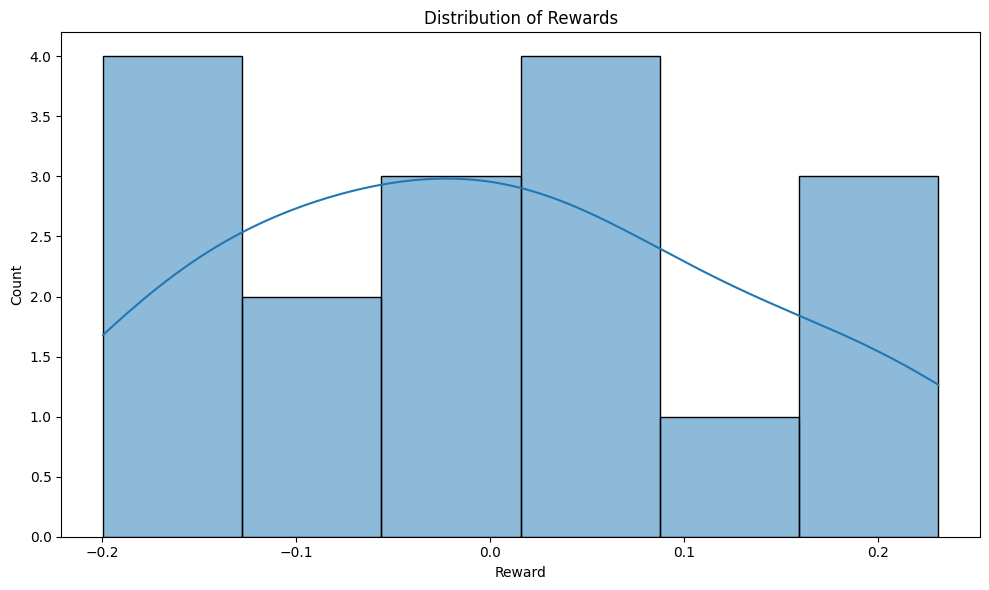

In [ ]:
# Distribution of Rewards
plt.figure(figsize=(10, 6))
sns.histplot(data=viz_df, x='reward', kde=True)
plt.xlabel('Reward')
plt.ylabel('Count')
plt.title('Distribution of Rewards')
plt.tight_layout()
plt.show()



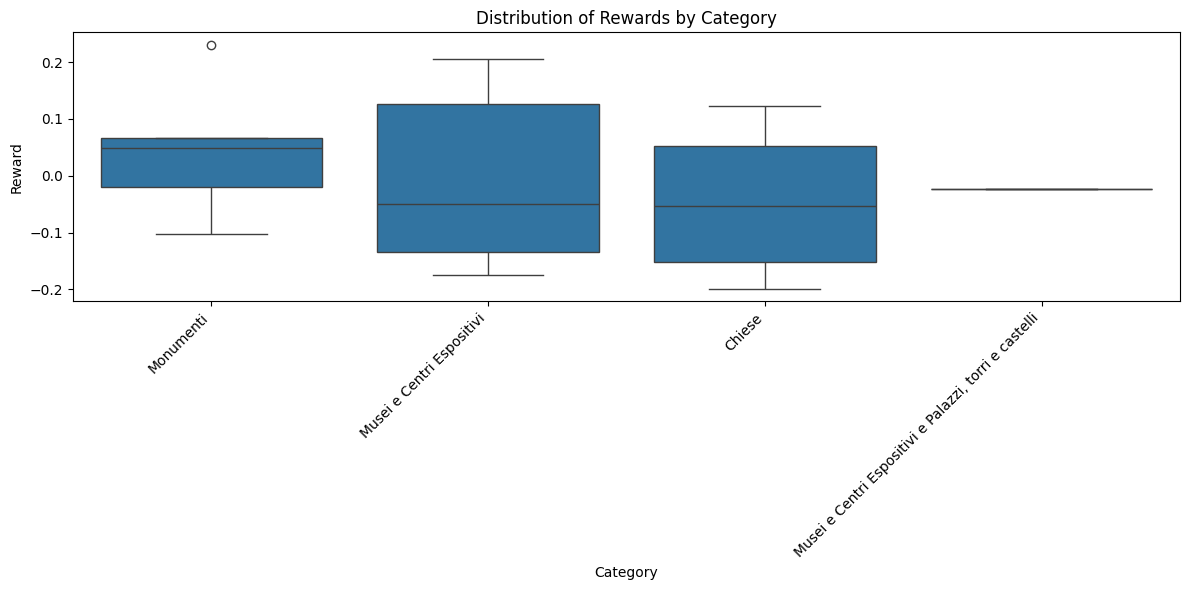

In [ ]:
# Merge with original DataFrame to get poi_names
viz_df = viz_df.merge(df_sorted[['poi', 'poi_name', 'category_name']].drop_duplicates(), on='poi', how='left')

# Sort by reward for better visualization
viz_df = viz_df.sort_values('reward', ascending=False)
# Rewards by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='reward', data=viz_df)
plt.xlabel('Category')
plt.ylabel('Reward')
plt.title('Distribution of Rewards by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



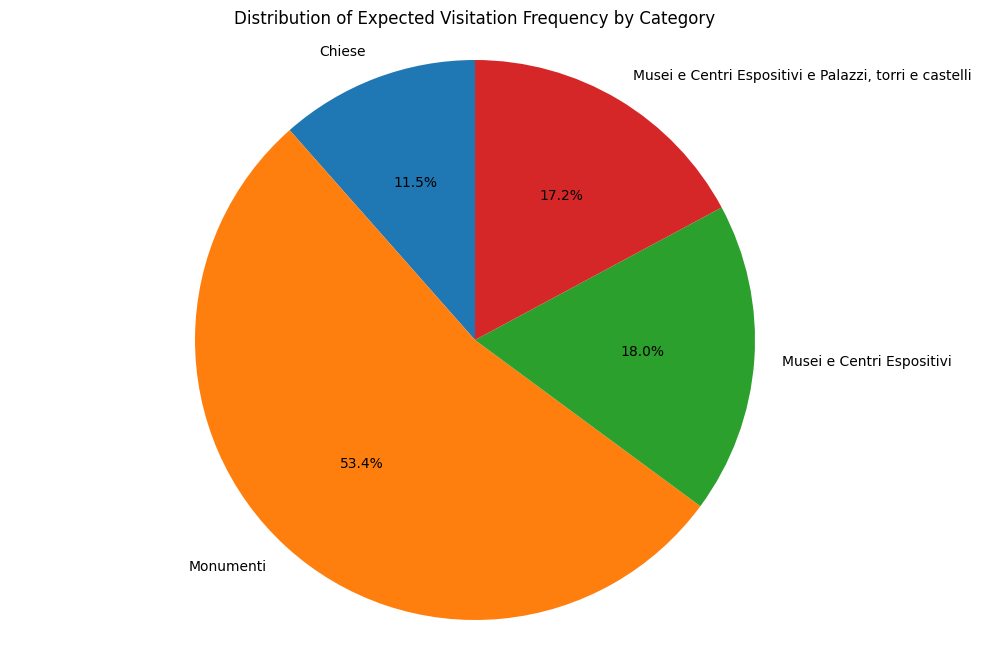

In [ ]:
#  Pie Chart: Distribution of Visitation Frequency by Category
plt.figure(figsize=(12, 8))
visits_by_category = viz_df.groupby('category_name')['e_svf'].sum()
plt.pie(visits_by_category, labels=visits_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Expected Visitation Frequency by Category')
plt.axis('equal')
plt.show()
